In [1]:
from libdatasets import *
import librun
import libstop
from importlib import reload
from libadversarial import uncertainty_stop
from libstop import rank_stop_conds
from dotenv import load_dotenv; load_dotenv();

# Base

In [2]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
        ("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        ("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [3]:
reload(librun)
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=9)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-6d23f521-0849-4347-b67d-66362ae3e3ff.json']


Experiment:   0%|          | 0/9 [00:00<?, ?it/s]

In [4]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

C:\Users\Zac\AppData\Local\pypoetry\Cache\virtualenvs\research-KKf5lz0r-py3.8\lib\site-packages\sklearn\metrics\_classification.py:620: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


Exception: short classifier file: rcv1__none__uncertainty__svm-linear__dataset_size=1000__labelled_size=10__test_size=0.5__n_runs=10__ret_classifiers=True__ensure_y=True__stop_info=True__aggregate=False__stop_function=l__pool_subsample=1000_2.zip
It has length 85 when it should have length 100

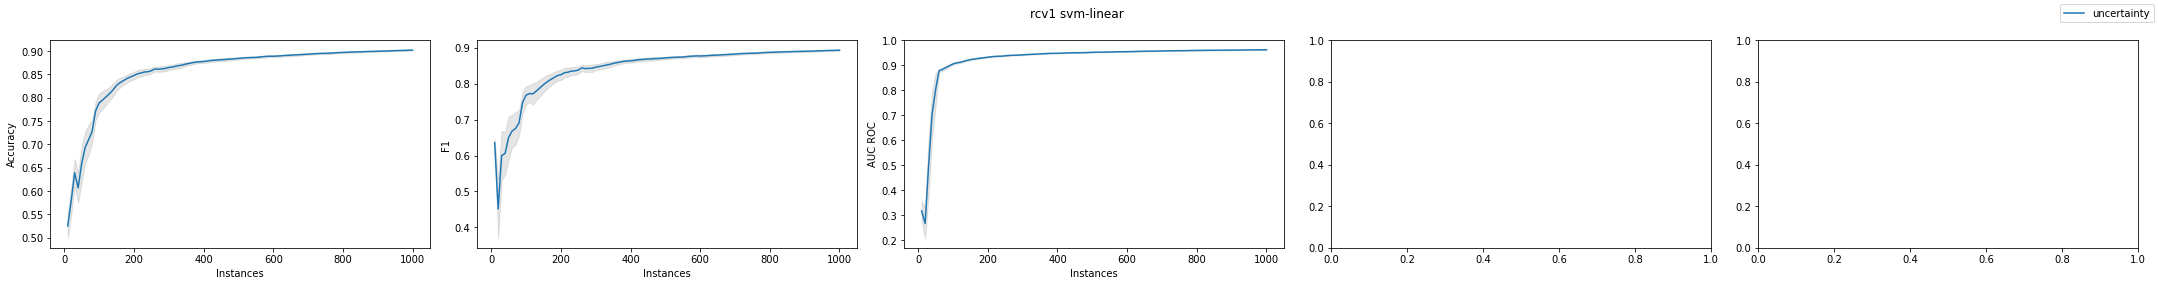

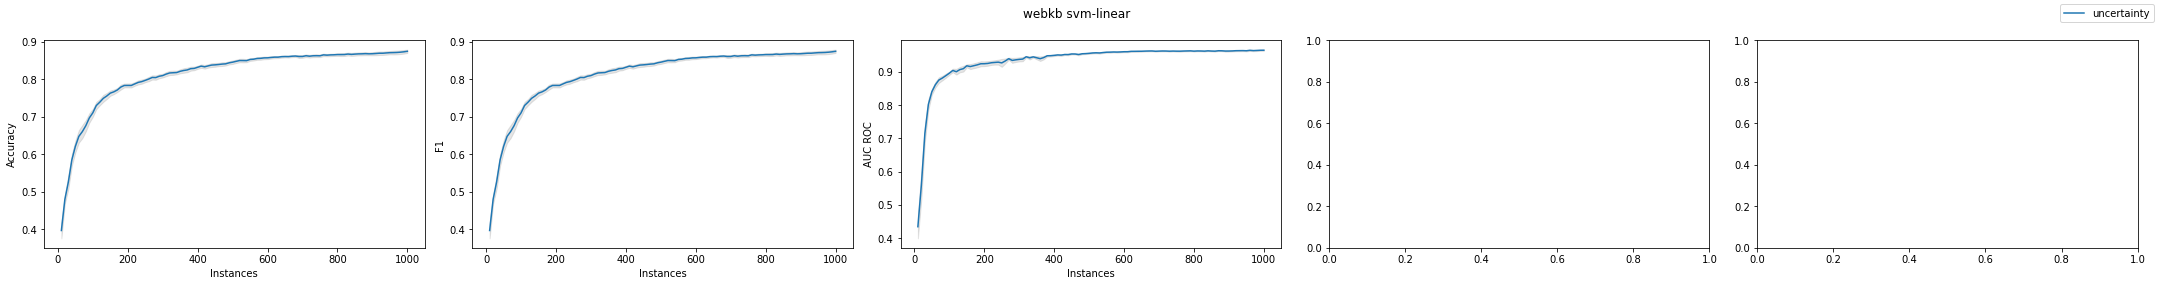

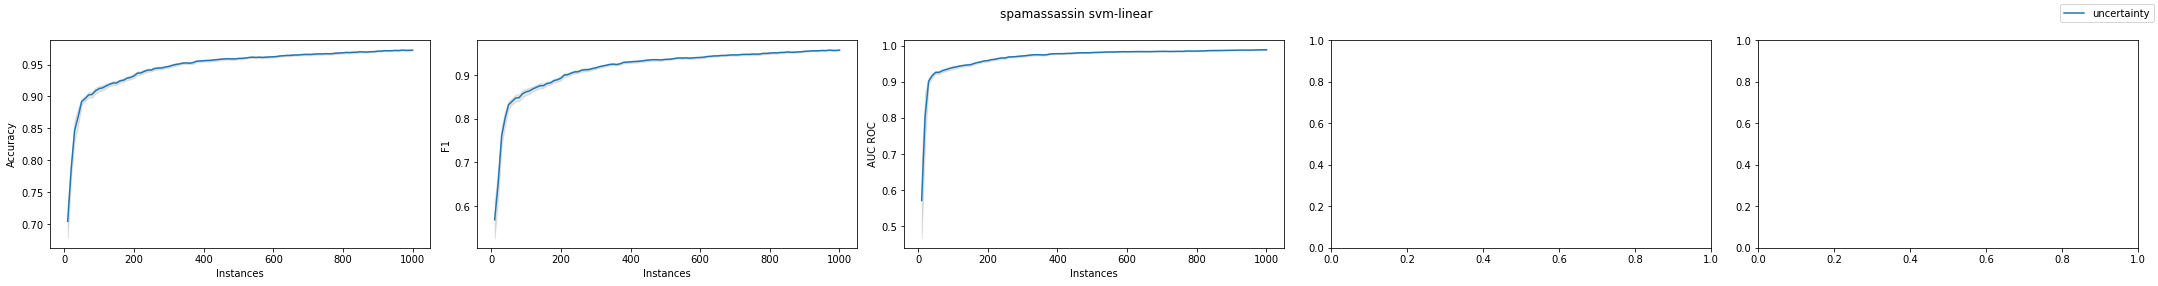

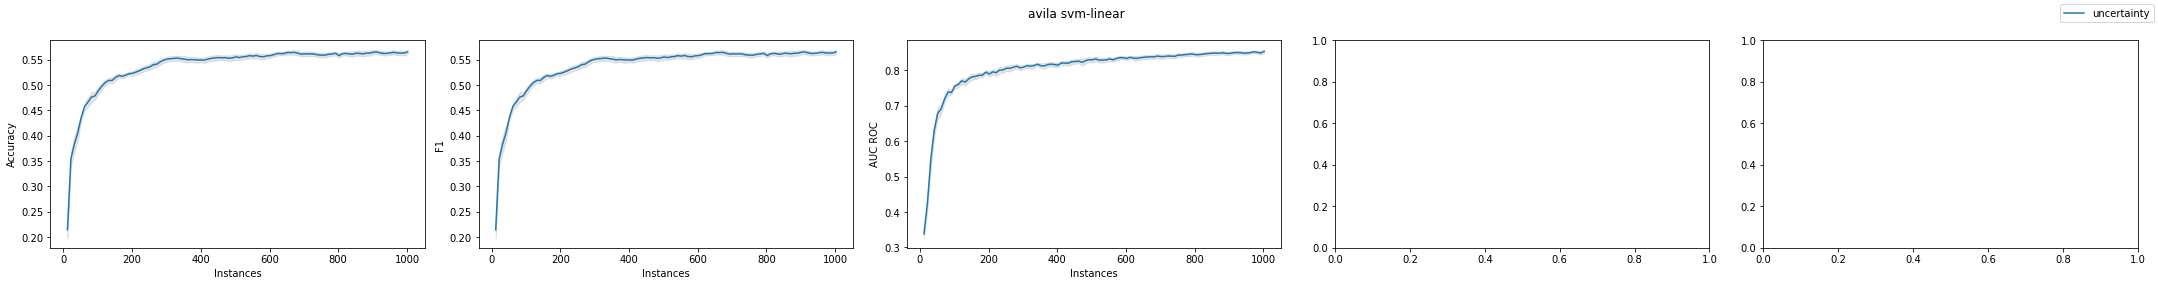

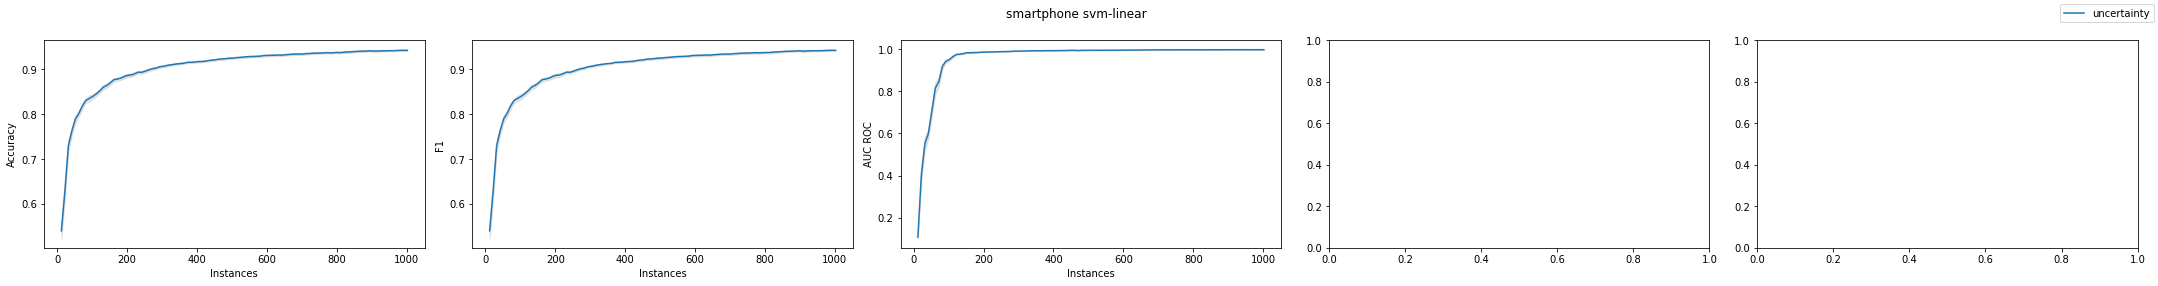

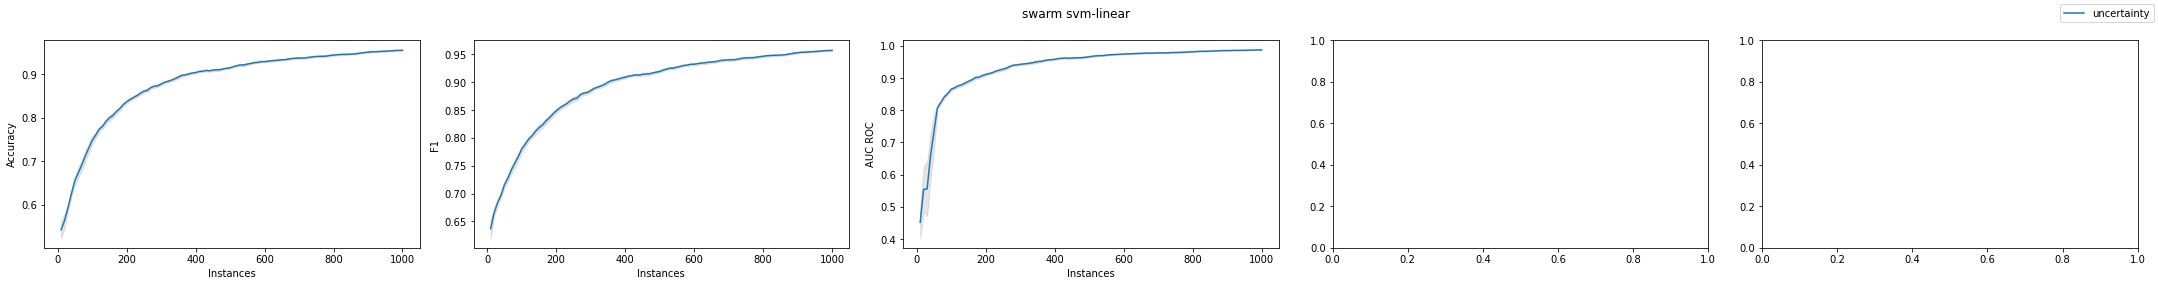

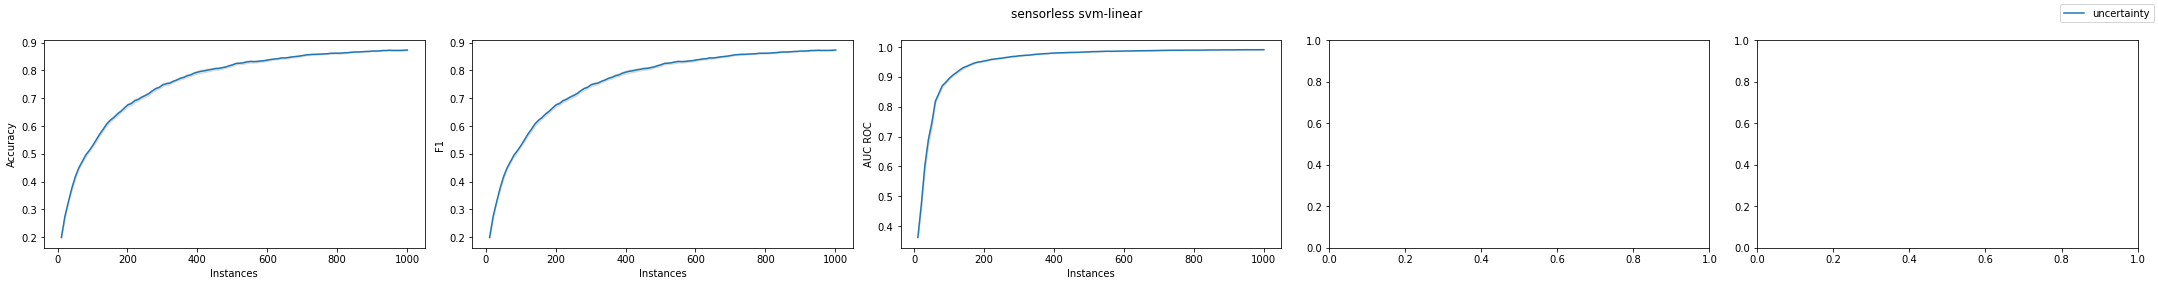

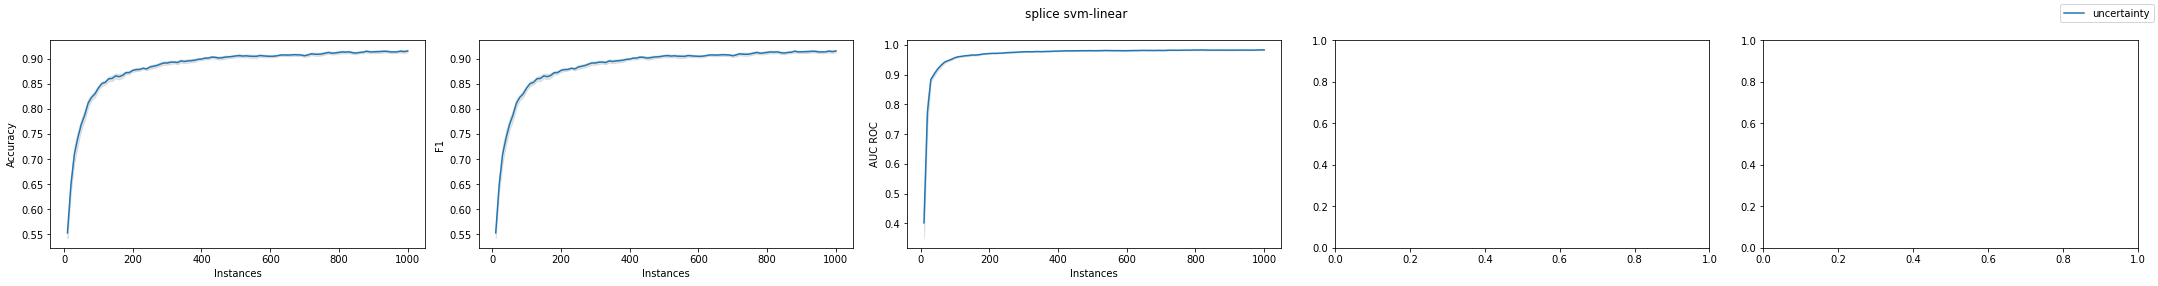

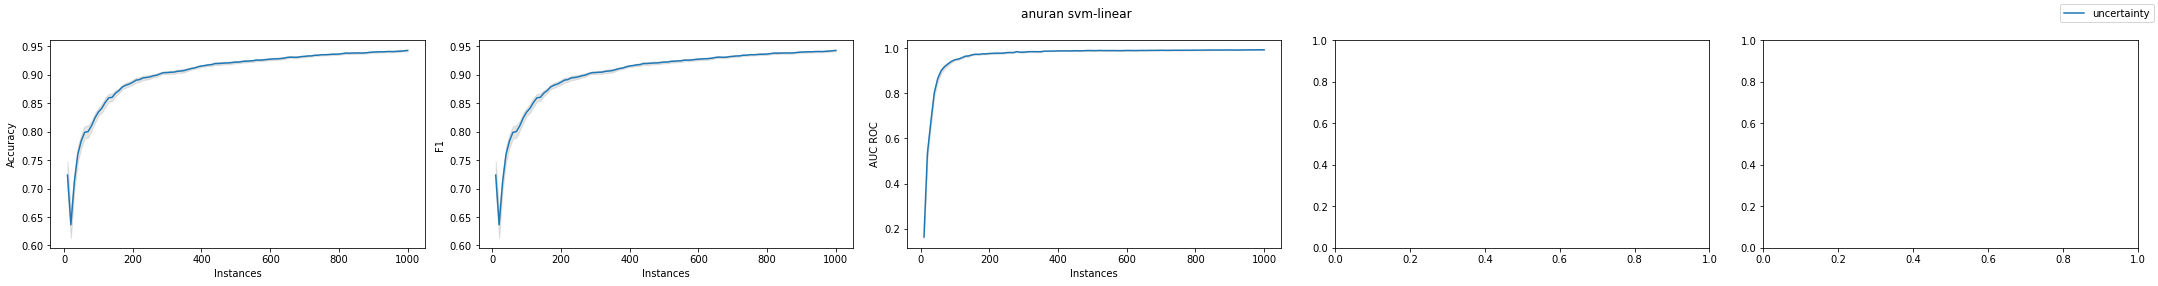

In [15]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4), scale='linear') # scale='logit'

In [ ]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'instances');

In [ ]:
reload(libstop); from libstop import rank_stop_conds
rank_stop_conds(stop_results, results_plots, 'roc_auc_score');

# Noise (10%)

In [4]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [5]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-4326f8ec-7bdc-469e-8a8f-a3c3e0834943.json']


Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

In [ ]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Noise (20%)

In [59]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise10": partial(noise, amount=2e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [60]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [61]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

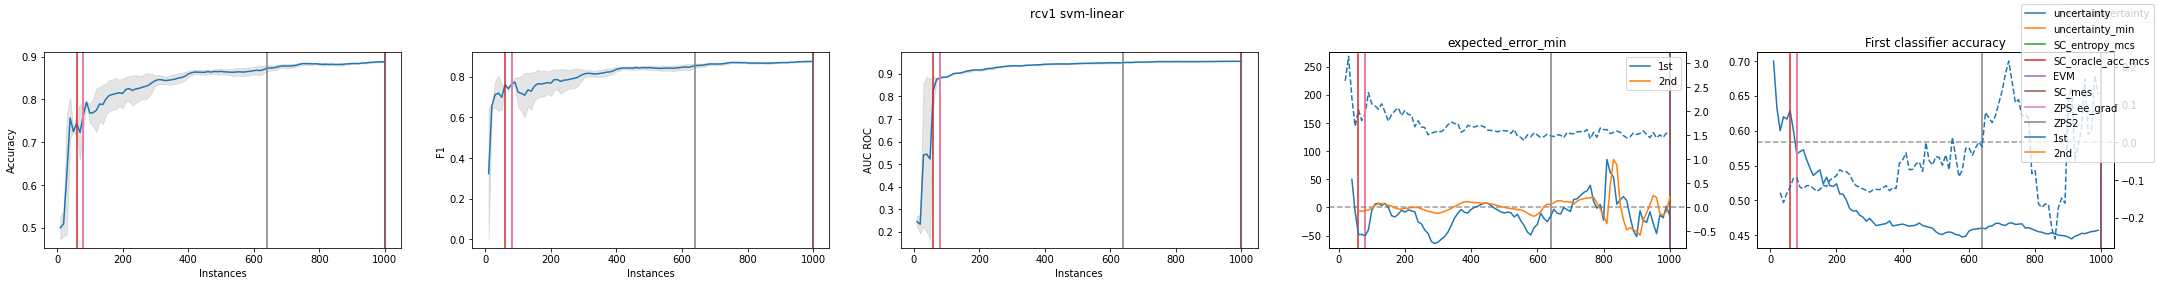

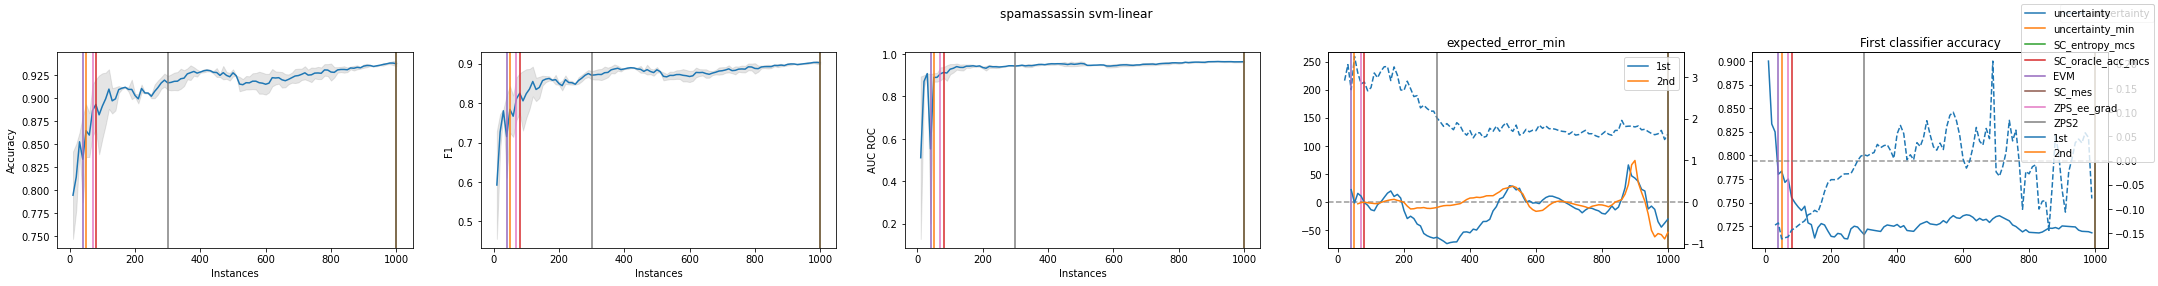

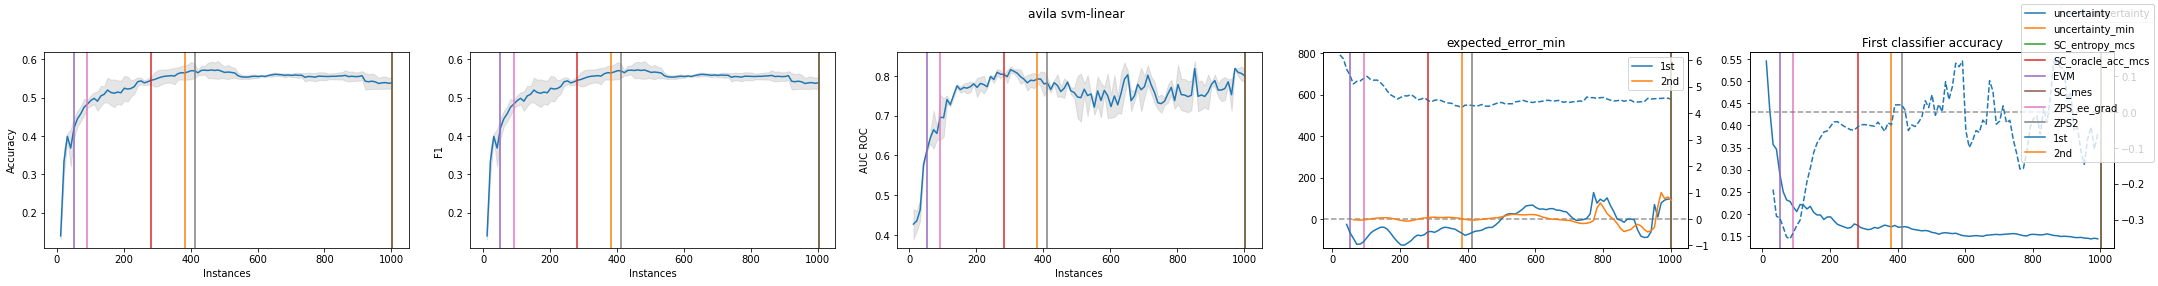

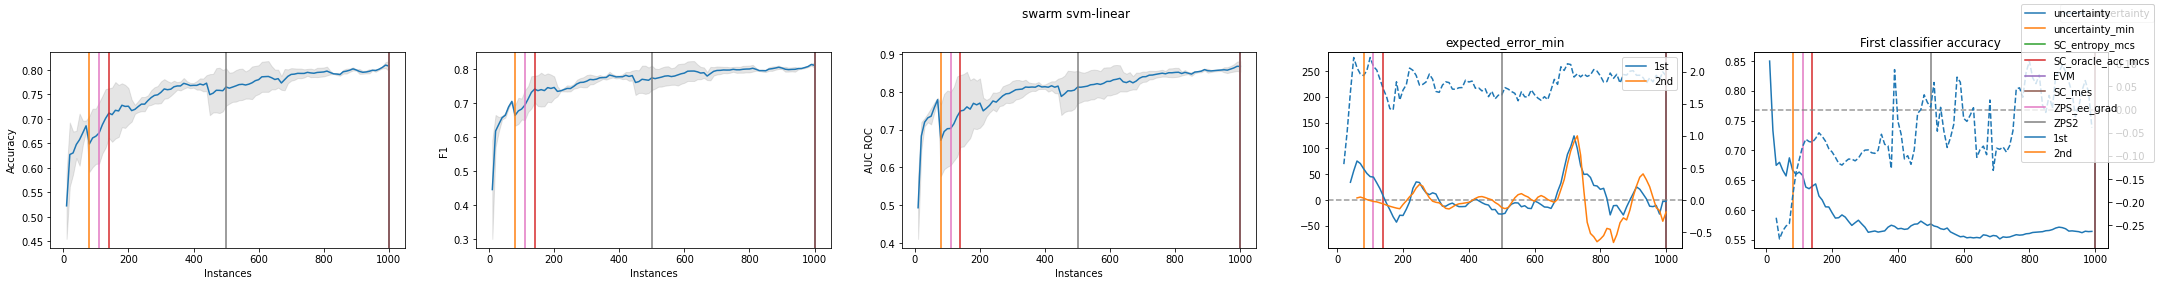

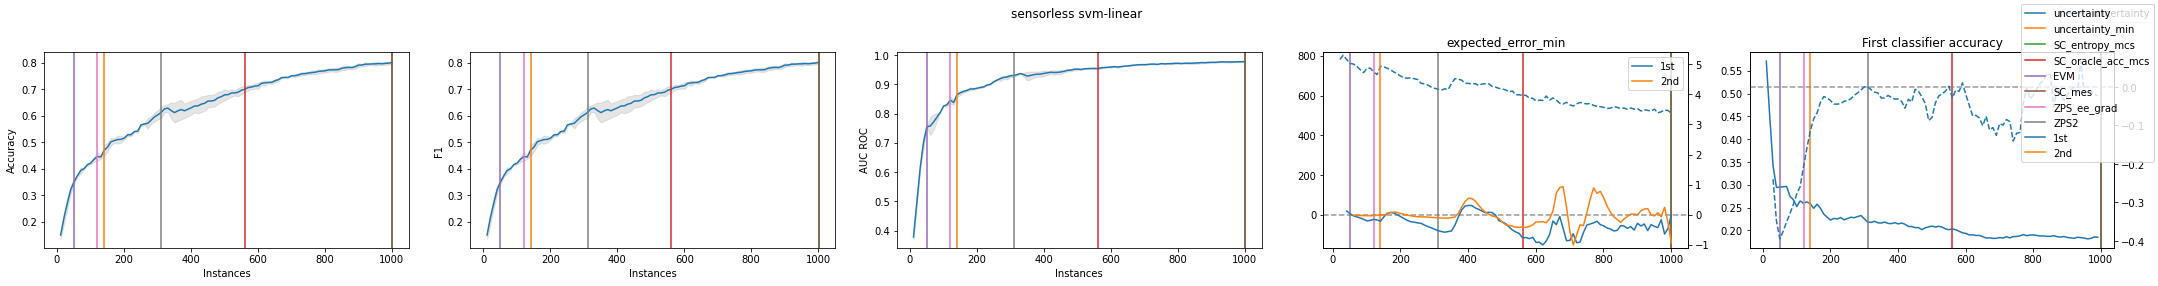

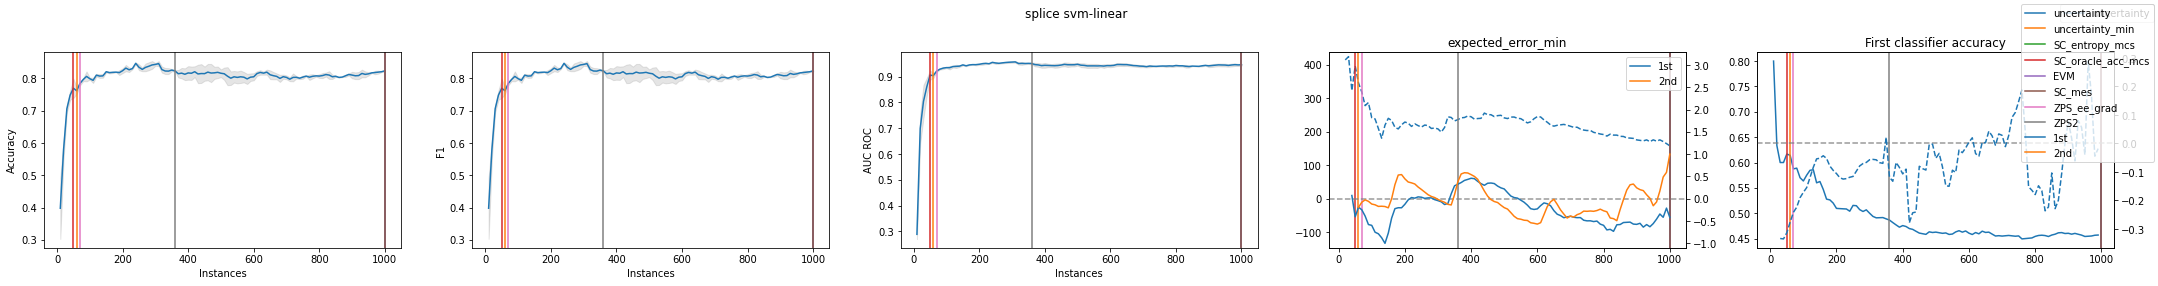

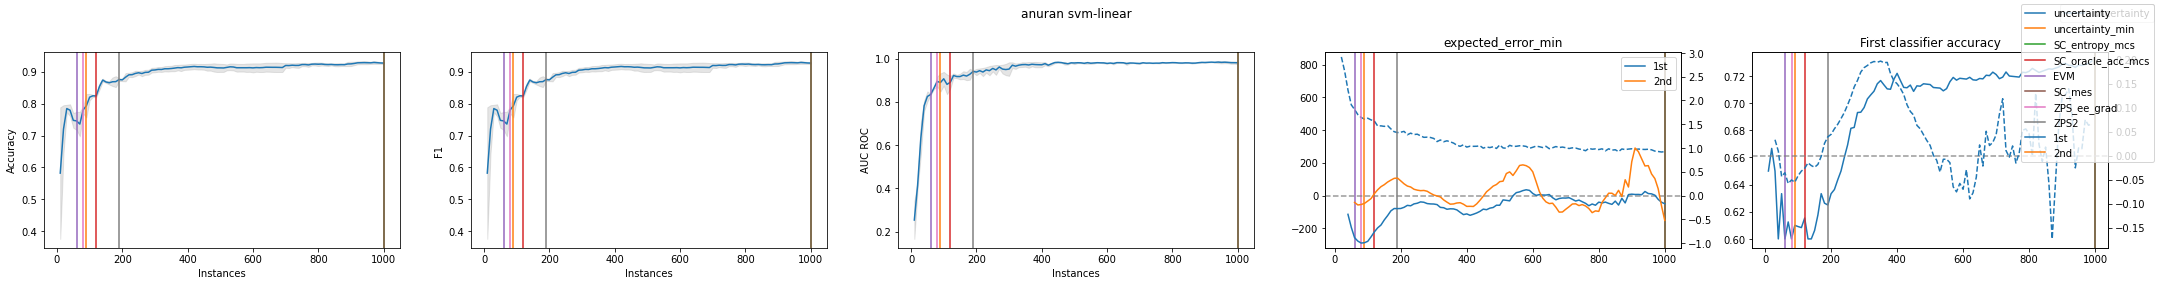

In [62]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Noise (30%)

In [59]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise30": partial(noise, amount=3e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [60]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [61]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

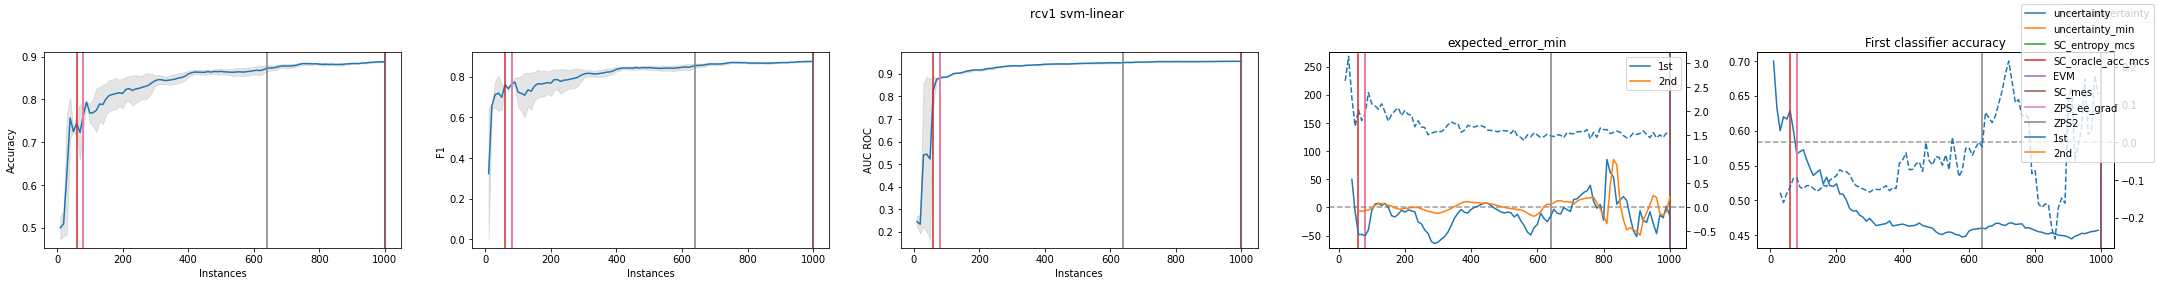

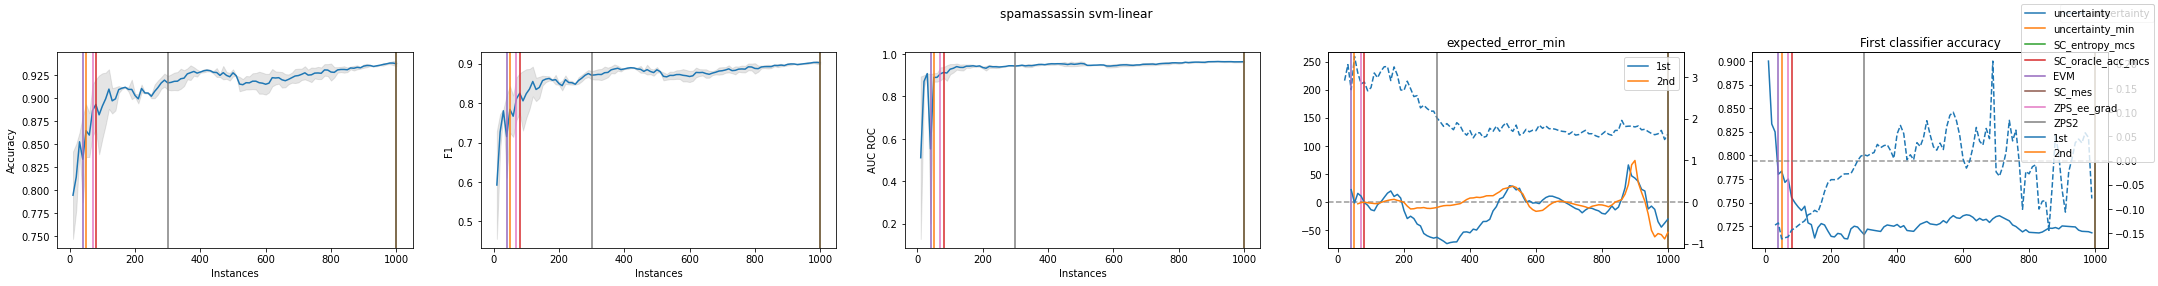

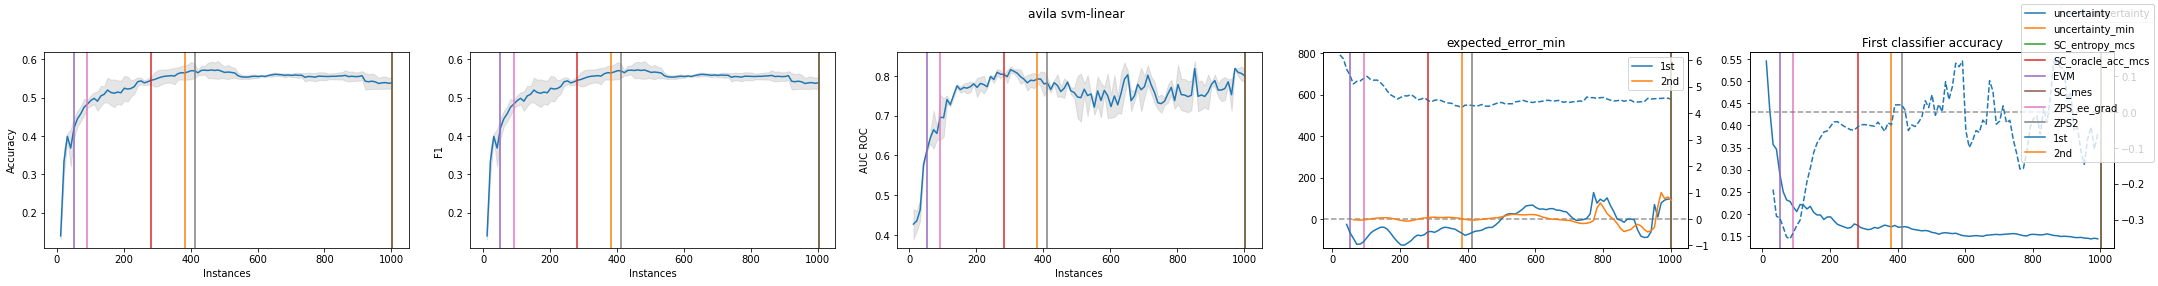

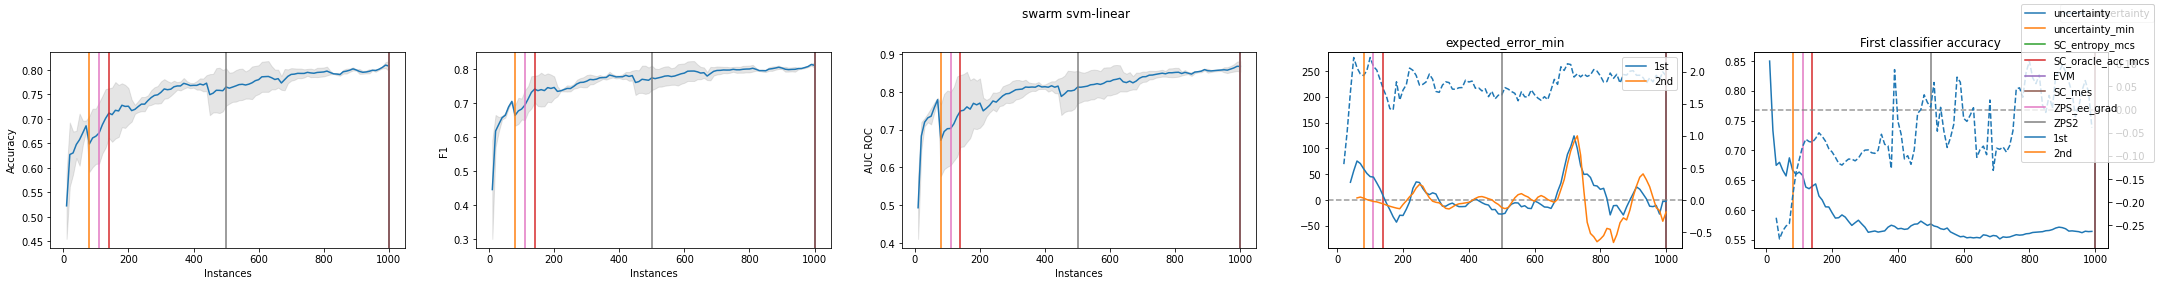

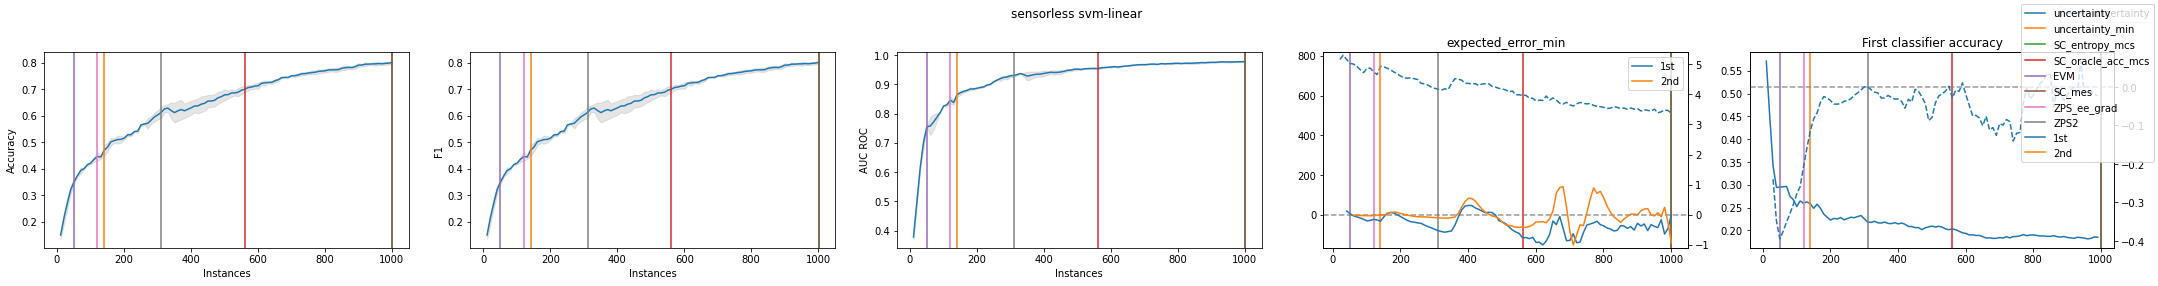

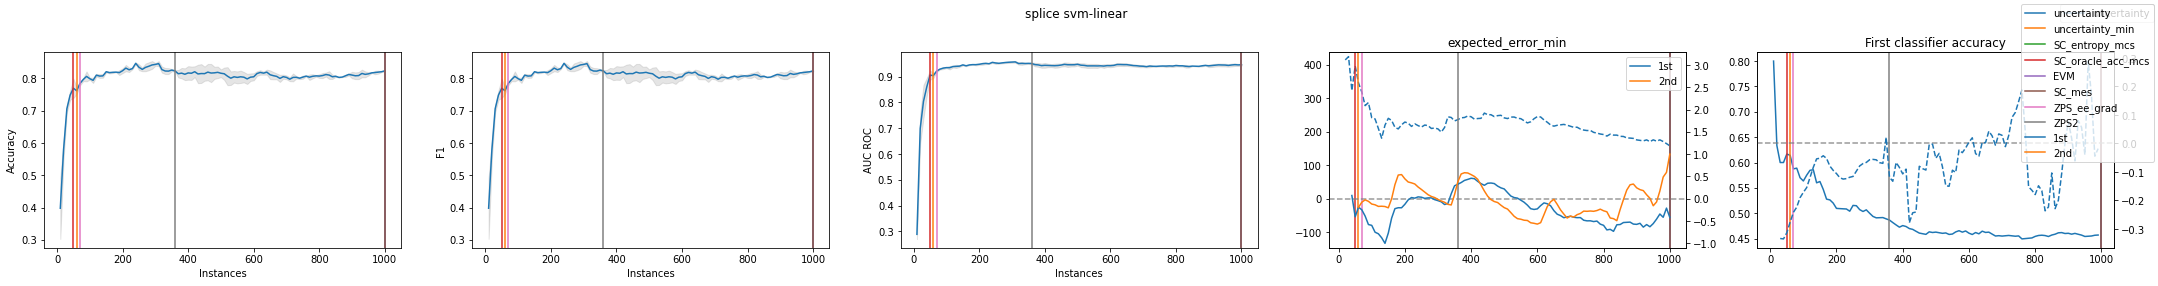

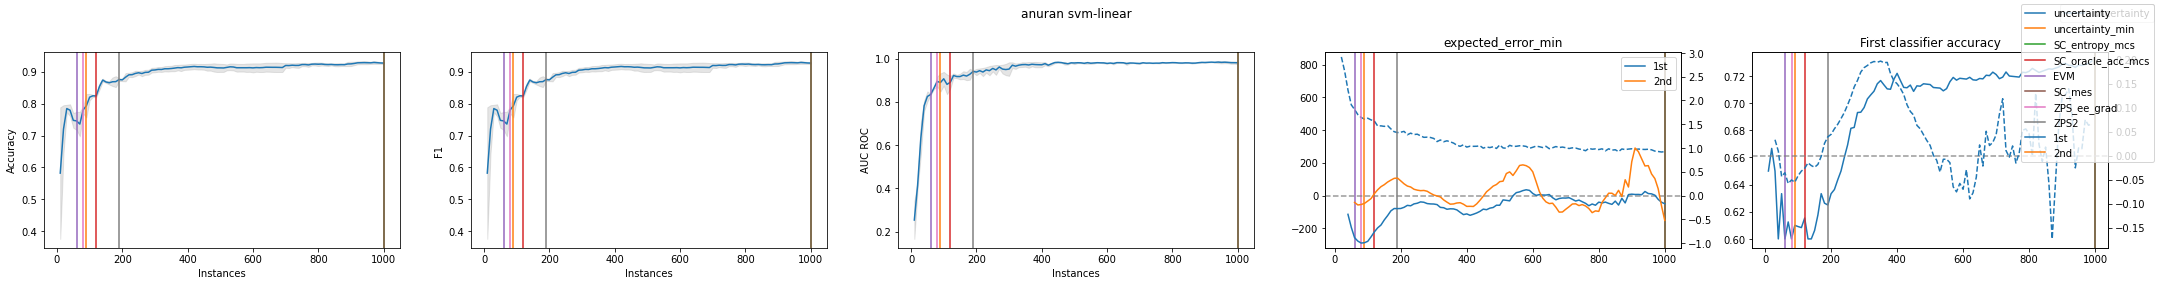

In [62]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Noise (40%)

In [5]:
def noise():
    pass
matrix = {
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "noise40": partial(noise, amount=4e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}


In [60]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/7 [00:00<?, ?it/s]

In [61]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

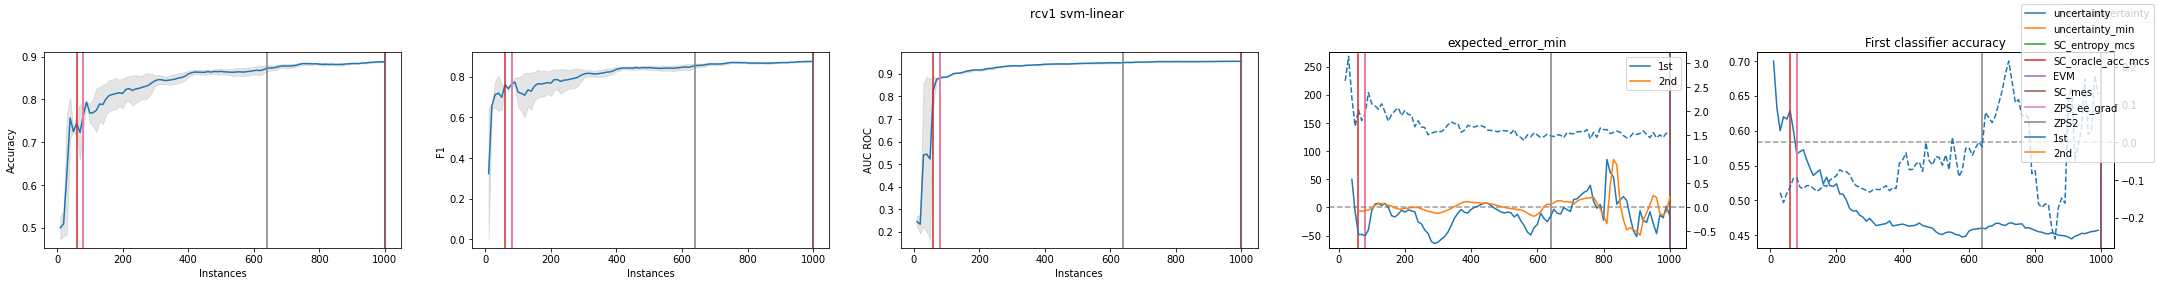

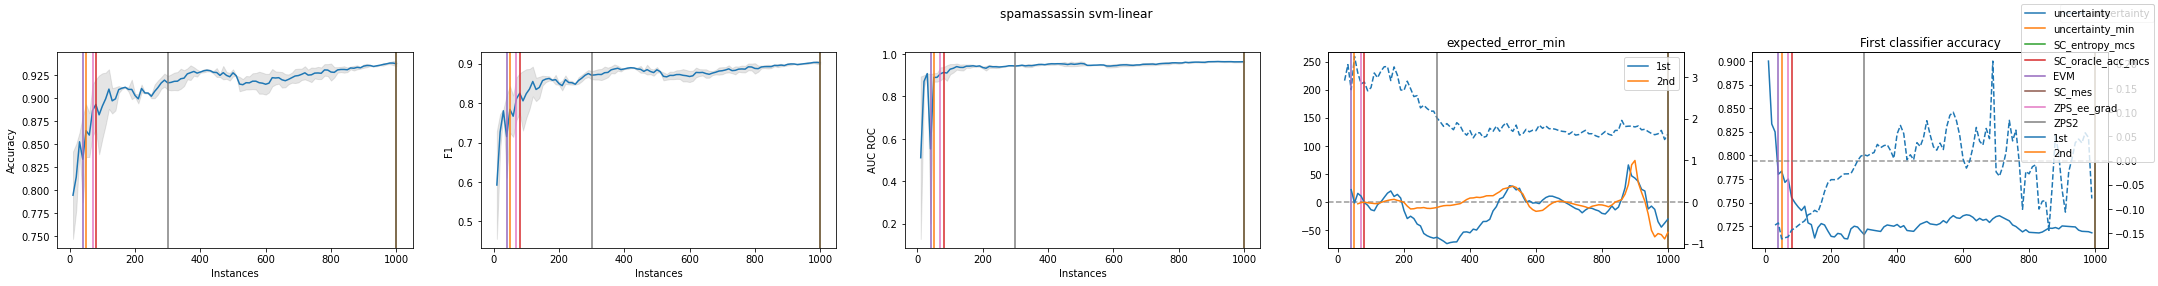

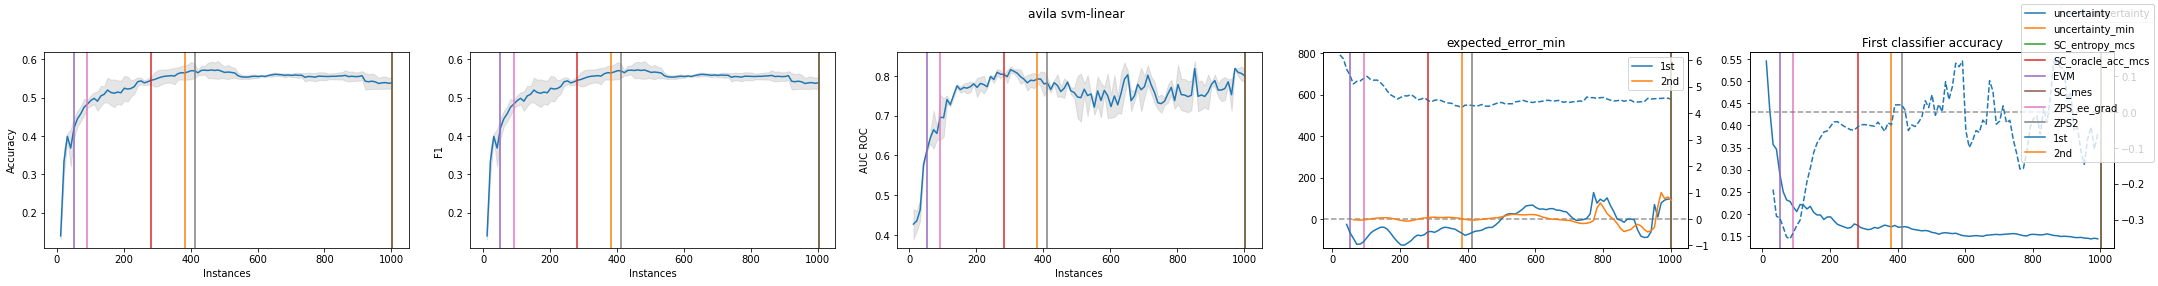

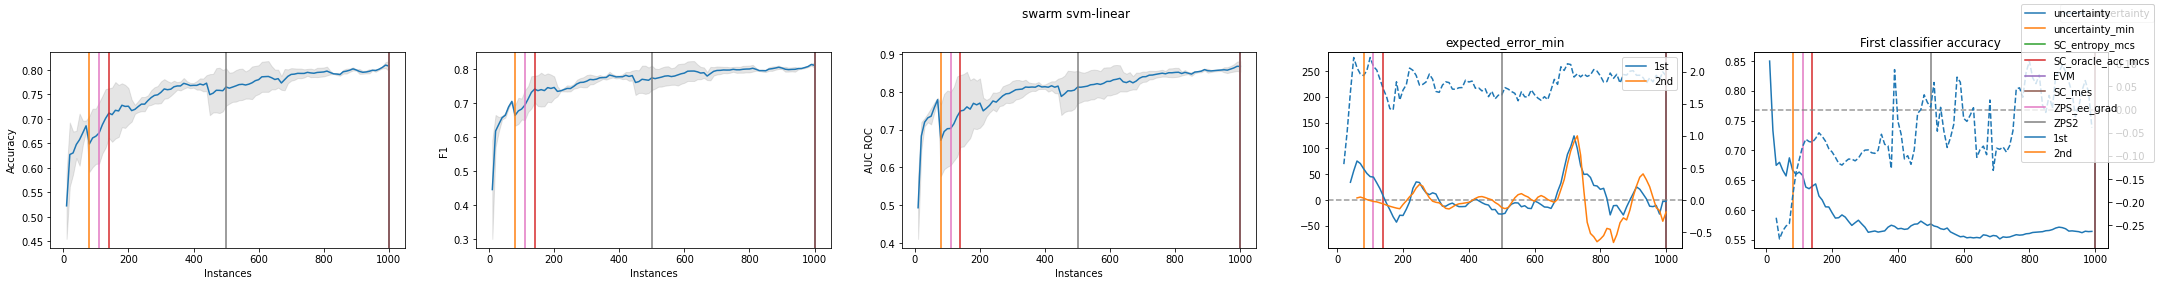

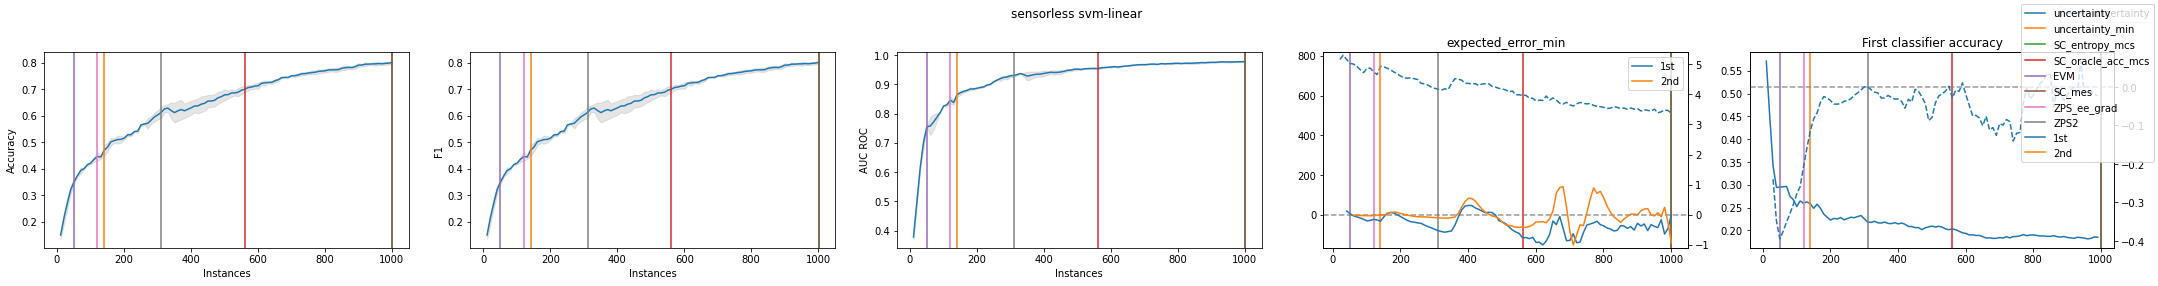

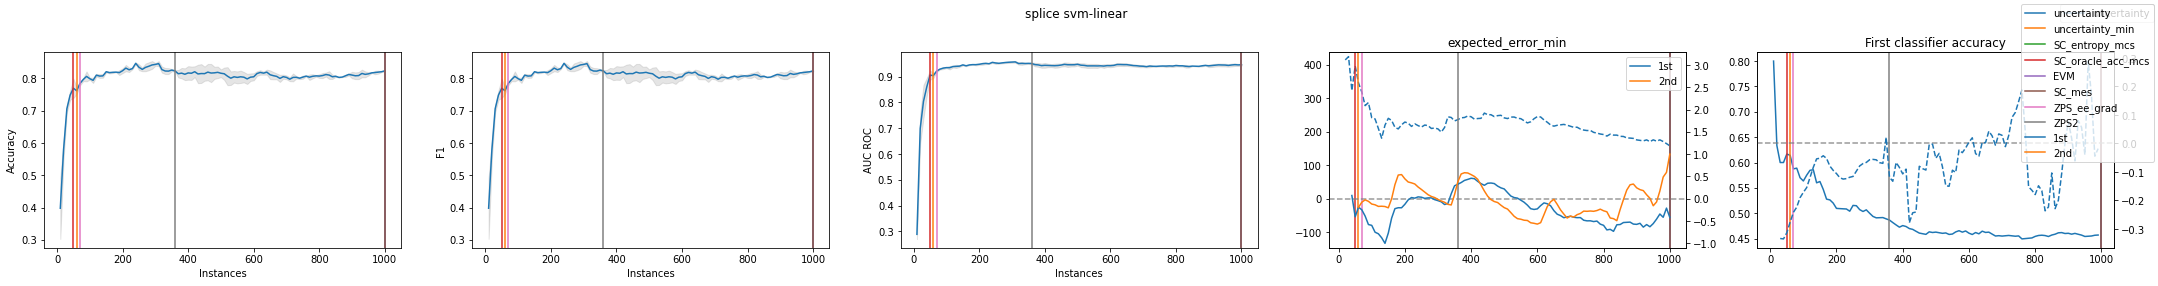

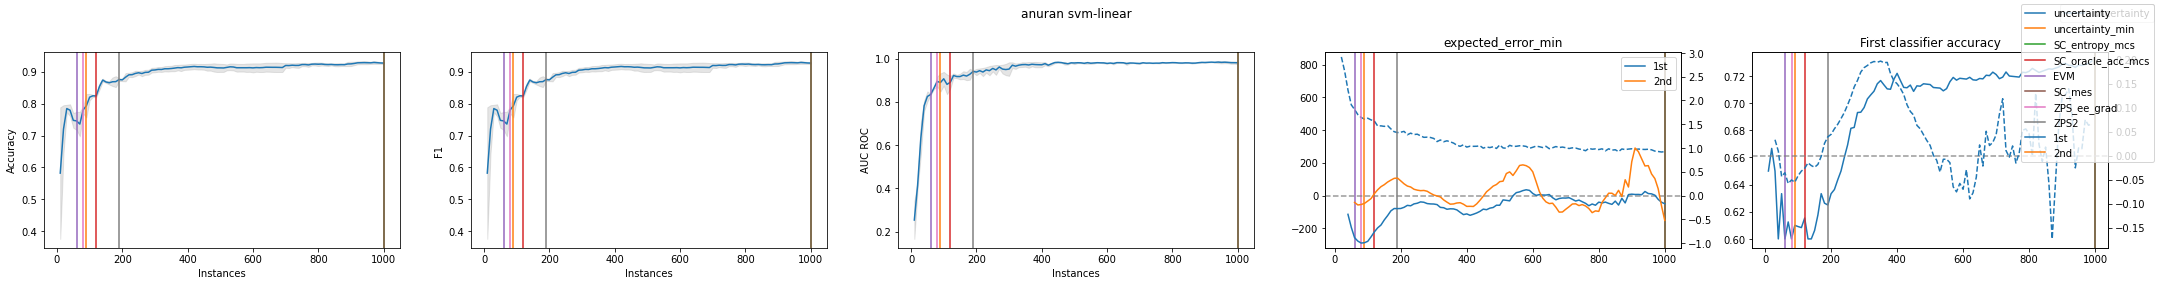

In [62]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Random Forest

In [6]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        ("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "random-forest"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [7]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=9)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-85b5ffd2-d28d-4506-a047-0d271631d9cc.json']


Experiment:   0%|          | 0/8 [00:00<?, ?it/s]

In [8]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

C:\Users\Zac\AppData\Local\pypoetry\Cache\virtualenvs\research-KKf5lz0r-py3.8\lib\site-packages\sklearn\metrics\_classification.py:620: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


[99, 99, 99, 99, 99, 99, 53, 53, 53, 52]


Exception: 

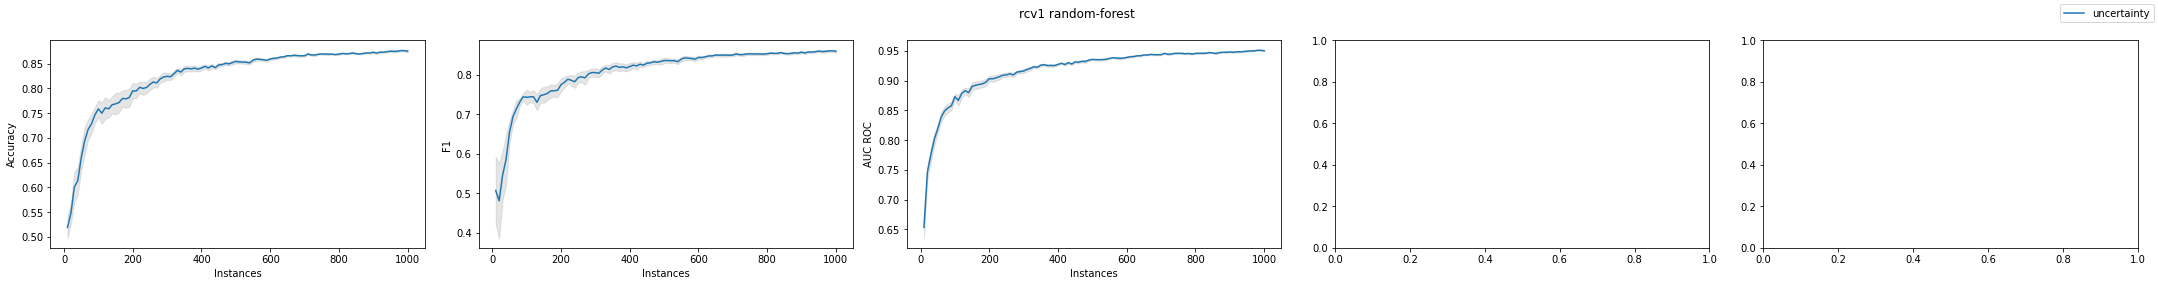

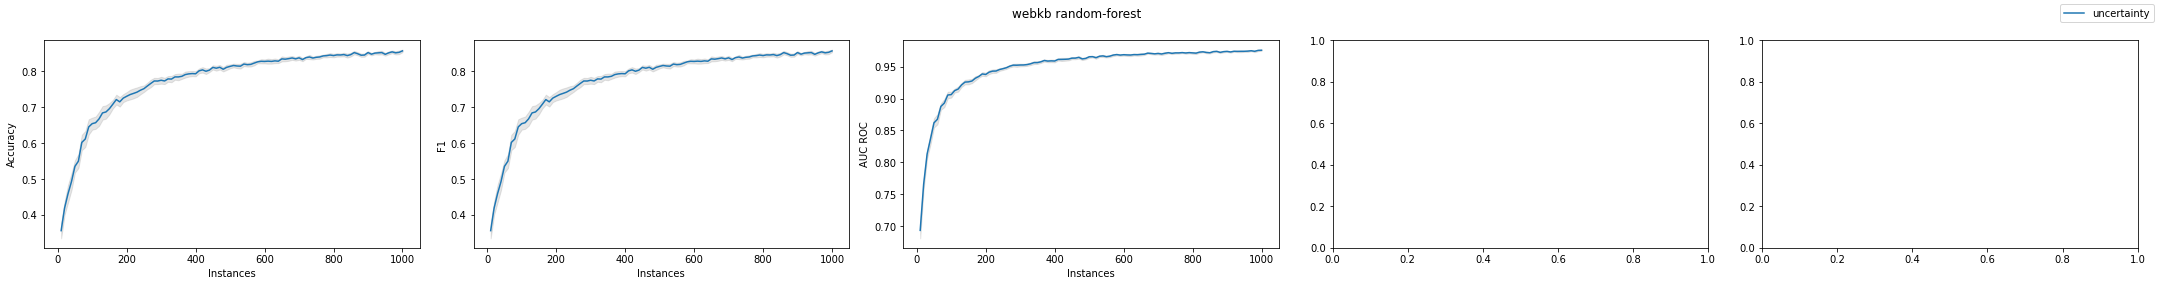

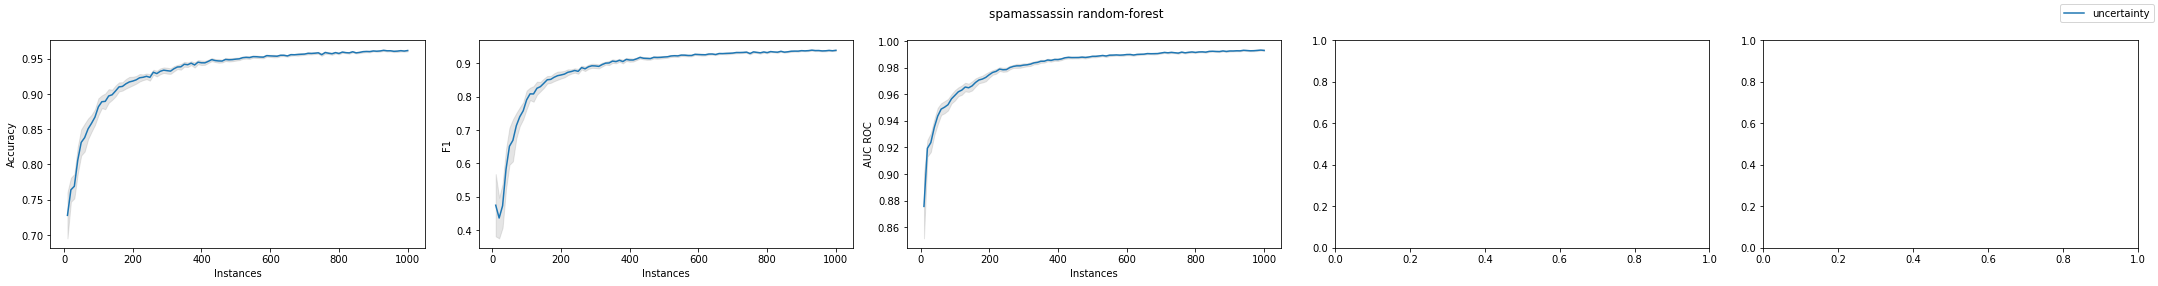

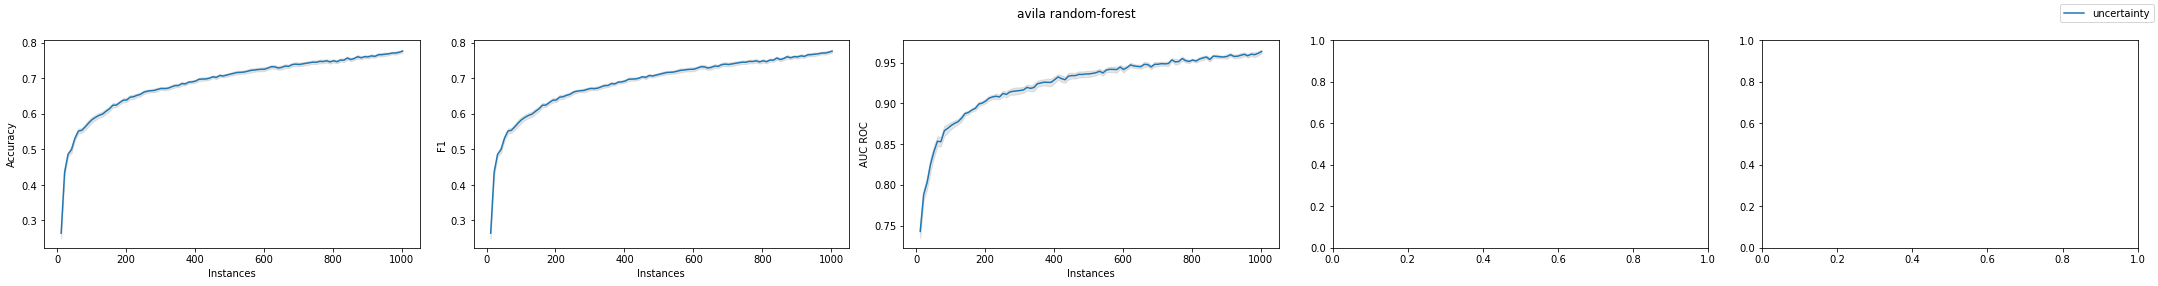

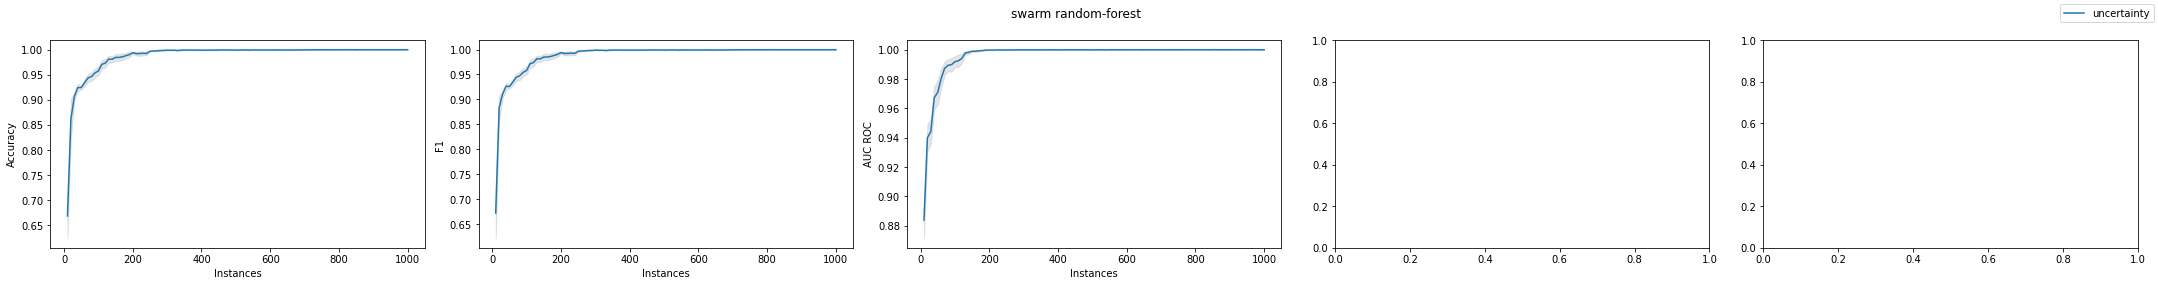

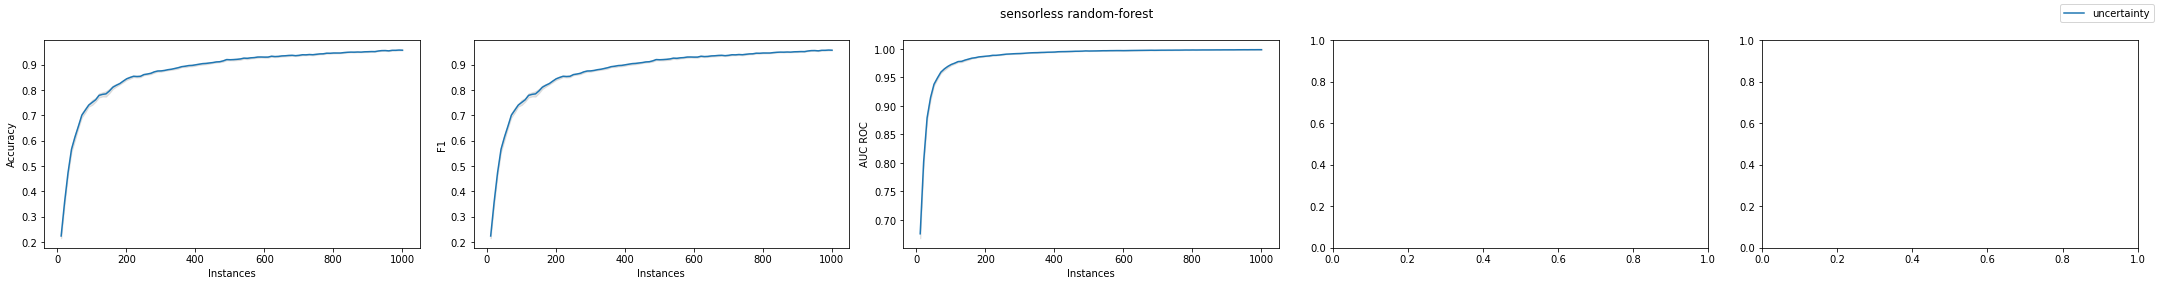

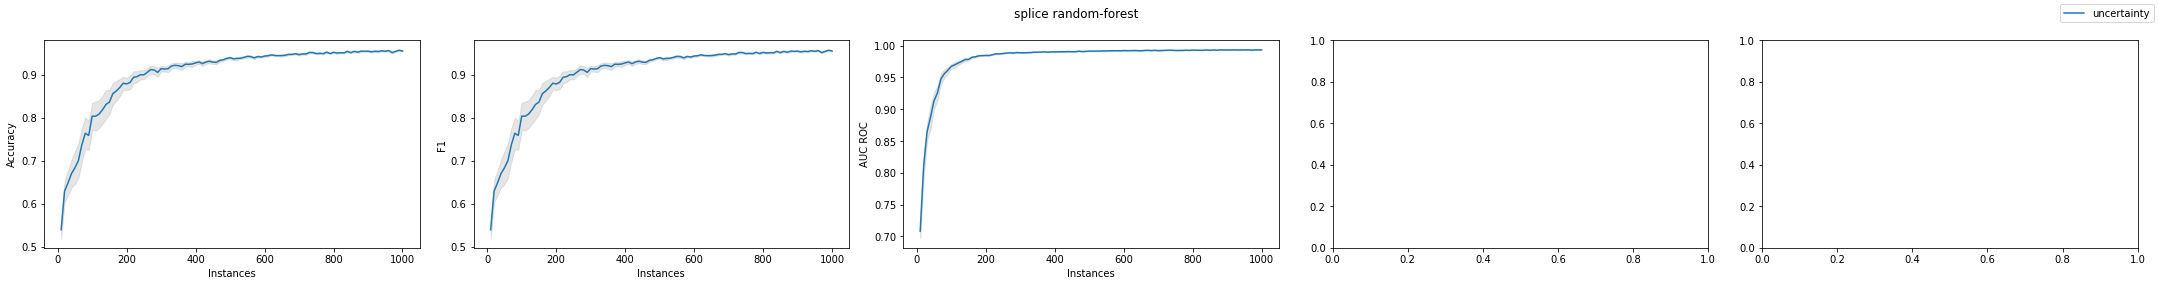

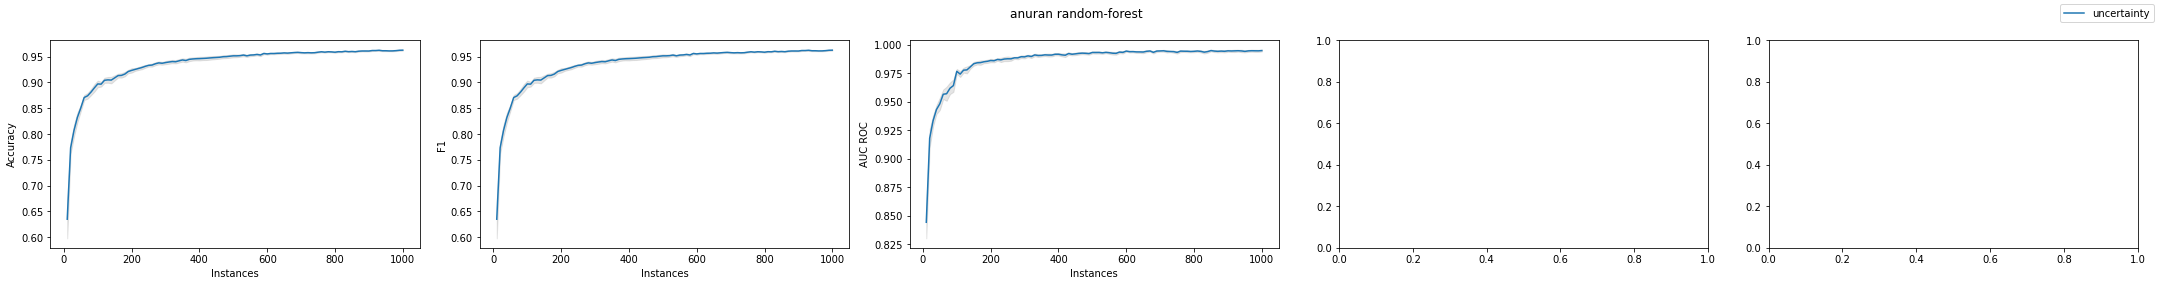

In [17]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Neural Network

In [42]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        #("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        #("spamassassin", wrap(spamassassin, None)),
        #("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        #("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "neural-network"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [43]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-7f0993fa-2d6f-45f3-9599-1a75289cf4a8.json']


Experiment:   0%|          | 0/3 [00:00<?, ?it/s]

In [44]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:
C:\Users\Zac\Programming\python\research\libactive.py:734: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask[rows] = False
C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:


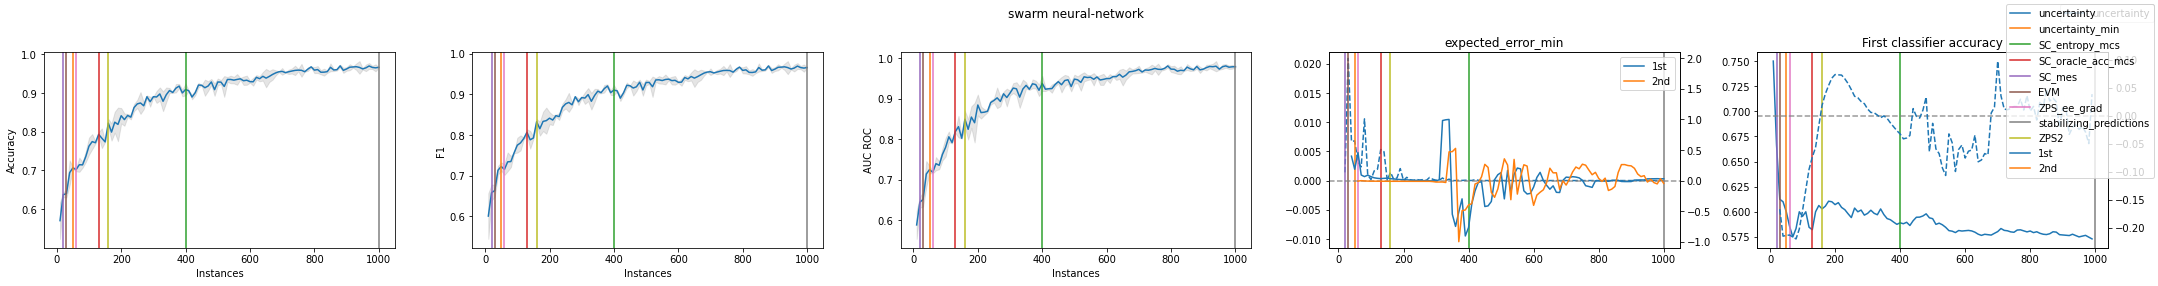

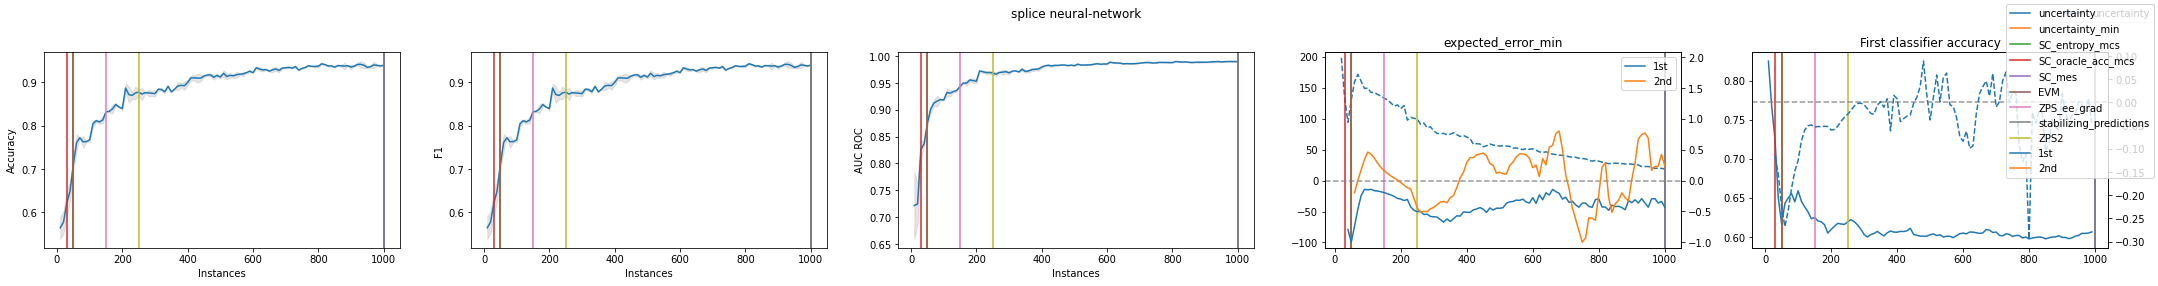

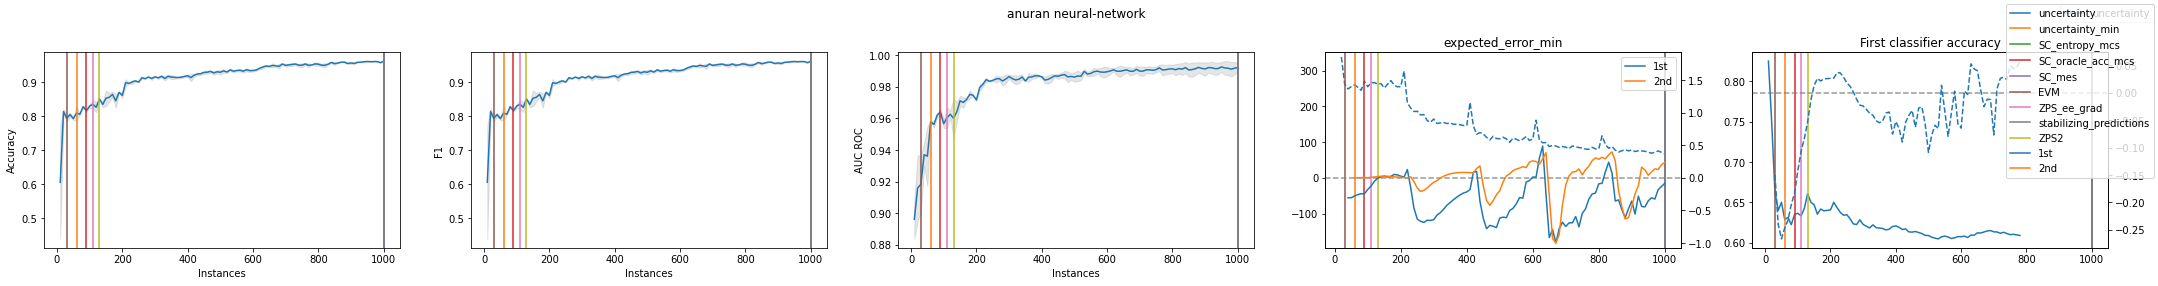

In [45]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Unbalanced

In [2]:
def unbalanced(X_train, X_test, y_train, y_test, amount=1e-1, rand=None, config_str=None, i=None, test_size=None, shuffle=None, **kwargs):
    pass

matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)

    # rcv1, sensorless, anuran are the only datasets to have >3000 instances after being unbalanced
    # maybe a different approach is better? Something non-binary?
    "datasets": [
        ("rcv1", wrap(rcv1, None)),
        ("sensorless", wrap(sensorless, None)),
        ("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "unbalanced10": partial(unbalanced, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [4]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

Experiment:   0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

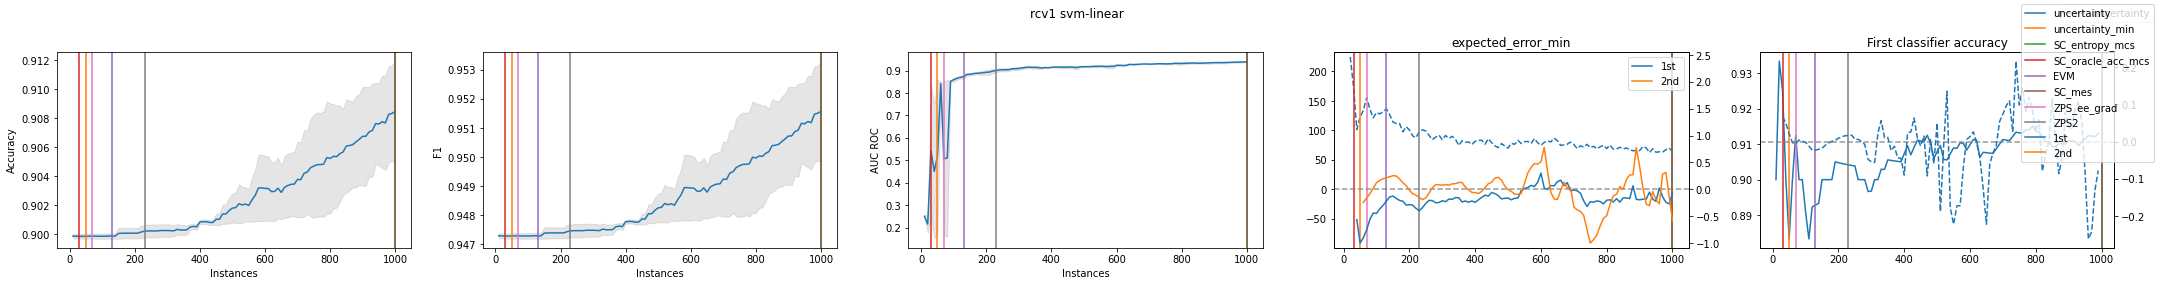

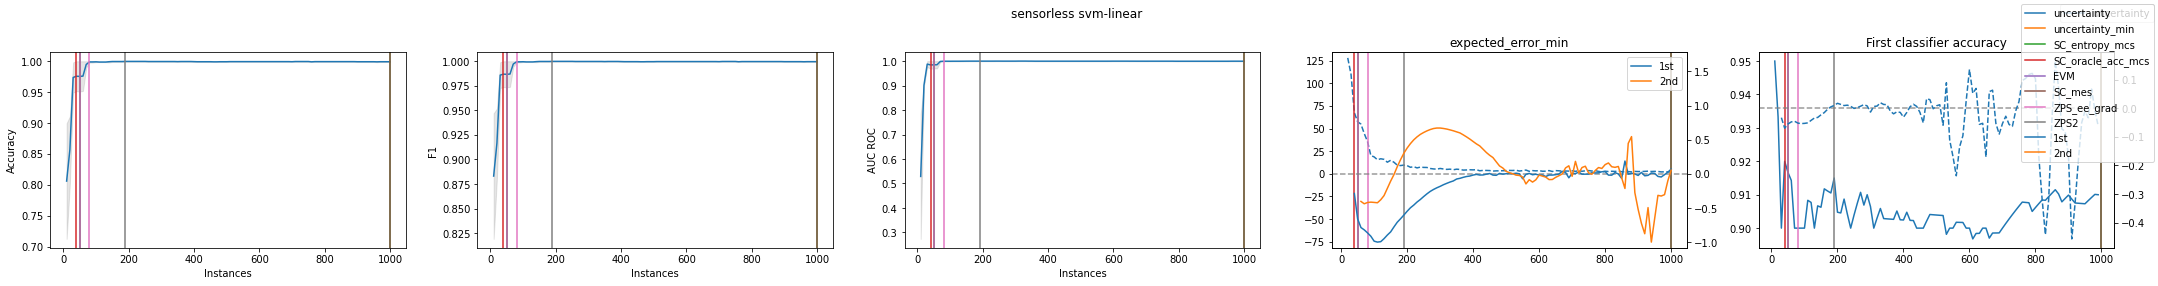

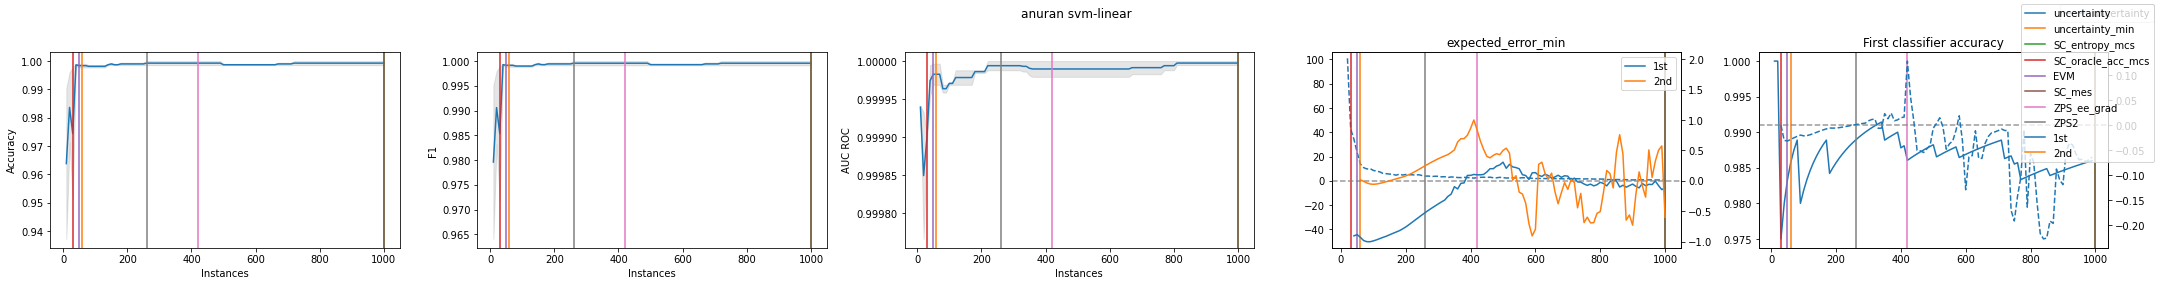

In [6]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

It seems like making the datasets binary made it too easy to create perfectly accurate classifiers. I don't know if reducing the balance further will really help.

# Unbalanced 2

In [46]:
def unbalanced(X_train, X_test, y_train, y_test, amount=1e-1, rand=None, config_str=None, i=None, test_size=None, shuffle=None, **kwargs):
    pass

matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)

    # rcv1, sensorless, anuran are the only datasets to have >3000 instances after being unbalanced
    # maybe a different approach is better? Something non-binary?
    "datasets": [
        #("rcv1", wrap(rcv1, None)),
        ("sensorless", wrap(sensorless, None)),
        #("anuran", wrap(anuran, None)),
    ],
    "dataset_mutators": {
        "unbalanced2-50": partial(unbalanced, amount=1e-1)
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 10,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [47]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=1)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

['C:\\Users\\Zac\\AppData\\Local\\pypoetry\\Cache\\virtualenvs\\research-KKf5lz0r-py3.8\\lib\\site-packages\\ipykernel_launcher.py', '-f', 'C:\\Users\\Zac\\AppData\\Roaming\\jupyter\\runtime\\kernel-7f0993fa-2d6f-45f3-9599-1a75289cf4a8.json']


Experiment:   0%|          | 0/1 [00:00<?, ?it/s]

In [48]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

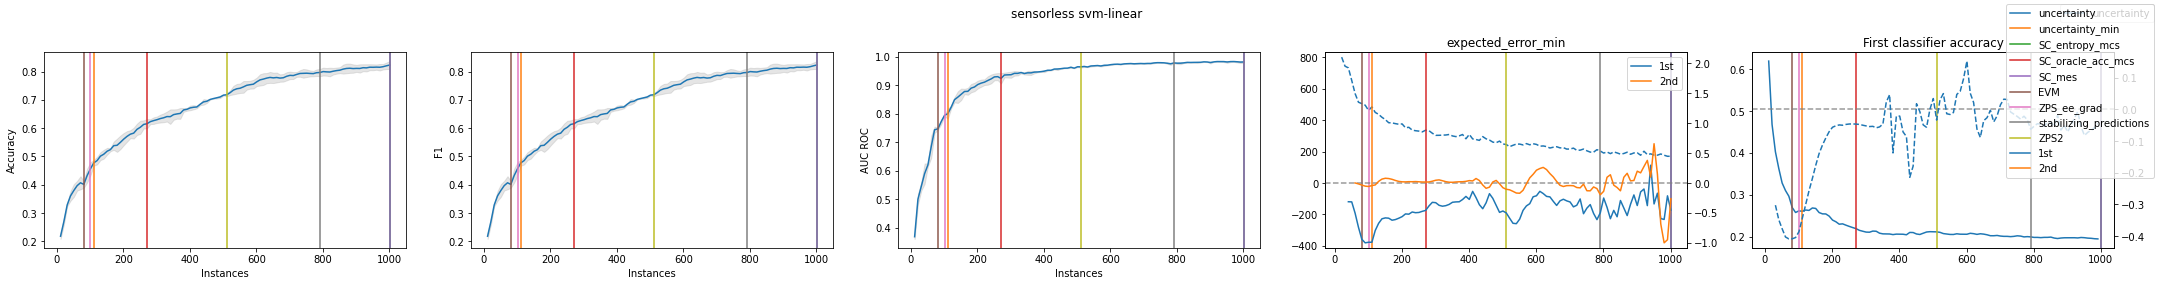

In [49]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))

# Labelled size (100)

In [ ]:
matrix = {
    # Dataset fetchers should cache if possible
    # Lambda wrapper required for function to be pickleable (sent to other threads via joblib)
    "datasets": [
        #("newsgroups", wrap(newsgroups, None)),
        ("rcv1", wrap(rcv1, None)),
        #("webkb", wrap(webkb, None)),
        ("spamassassin", wrap(spamassassin, None)),
        ("avila", wrap(avila, None)),
        #("smartphone", wrap(smartphone, None)),
        ("swarm", wrap(swarm, None)),
        ("sensorless", wrap(sensorless, None)),
        ("splice", wrap(splice, None)),
        ("anuran", wrap(anuran, None)),
        
    ],
    "dataset_mutators": {
        "none": (lambda *x, **kwargs: x),
    },
    "methods": [
        ("uncertainty", partial(uncertainty_stop, n_instances=10)),
    ],
    "models": [
        "svm-linear"
    ],
    "meta": {
        "dataset_size": 1000,
        "labelled_size": 100,
        "test_size": 0.5,
        "n_runs": 10,
        "ret_classifiers": True,
        "ensure_y": True,
        "stop_info": True,
        "aggregate": False,
        "stop_function": ("len1000", lambda learner: learner.y_training.shape[0] >= 1000),
        "pool_subsample": 1000
    }
}

In [ ]:
results = librun.run(matrix, force_cache=True, fragment_run_start=0, fragment_run_end=5)
results_plots = [result[0] for result in results]
classifiers = [result[1] for result in results]
classifiers = [clf for clf in classifiers]

In [52]:
stop_conditions, stop_results = libstop.eval_stopping_conditions(results_plots, classifiers)

C:\Users\Zac\Programming\python\research\libactive.py:734: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask[rows] = False
C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if klass not in Y_labelled:
C:\Users\Zac\Programming\python\research\libactive.py:734: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mask[rows] = False
C:\Users\Zac\Programming\python\research\libactive.py:71: FutureWarning: elementwi

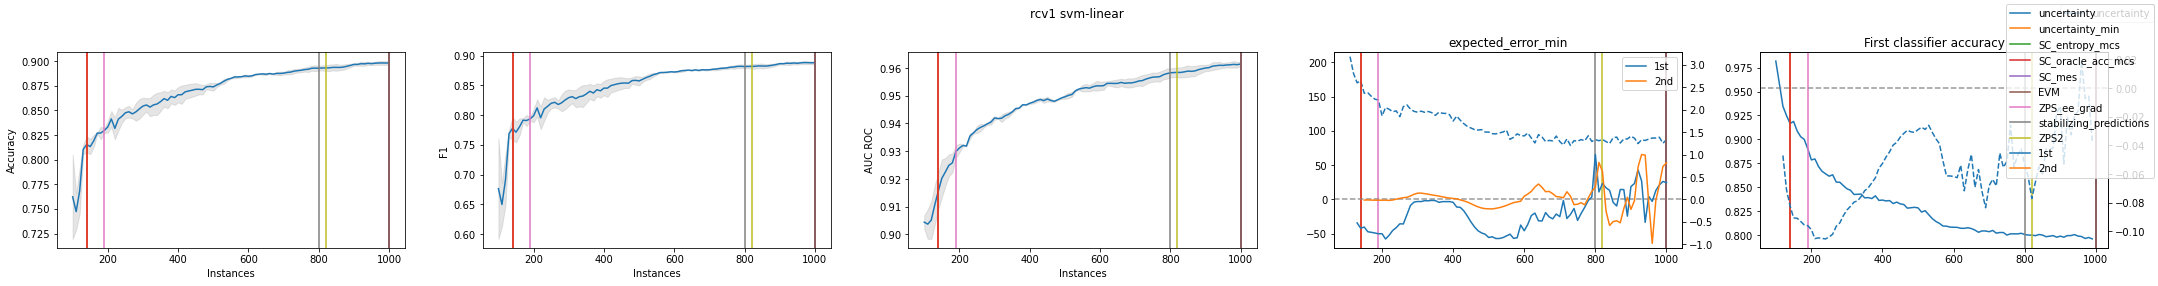

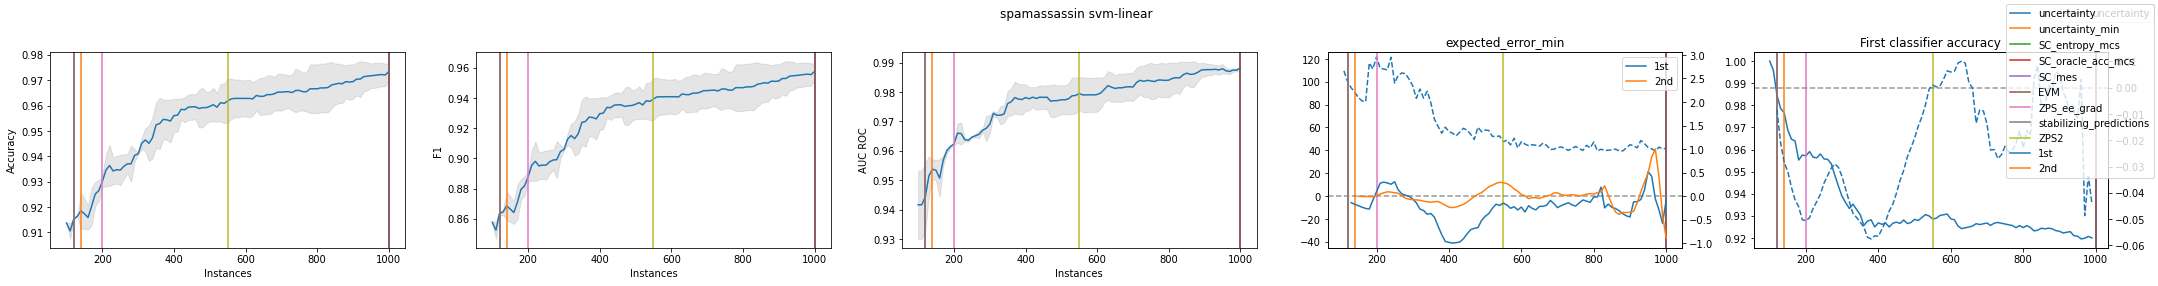

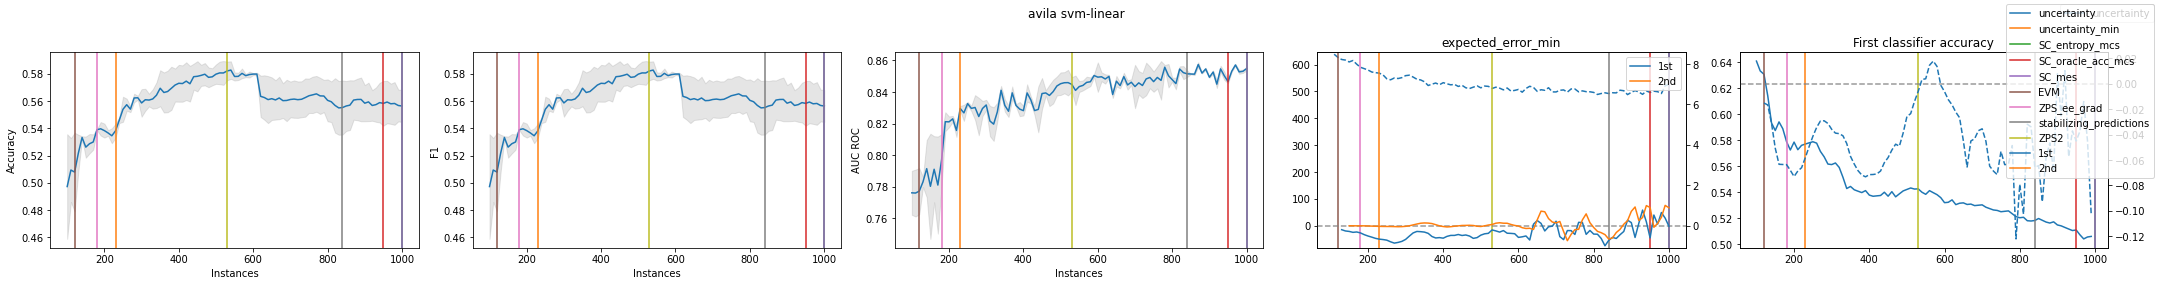

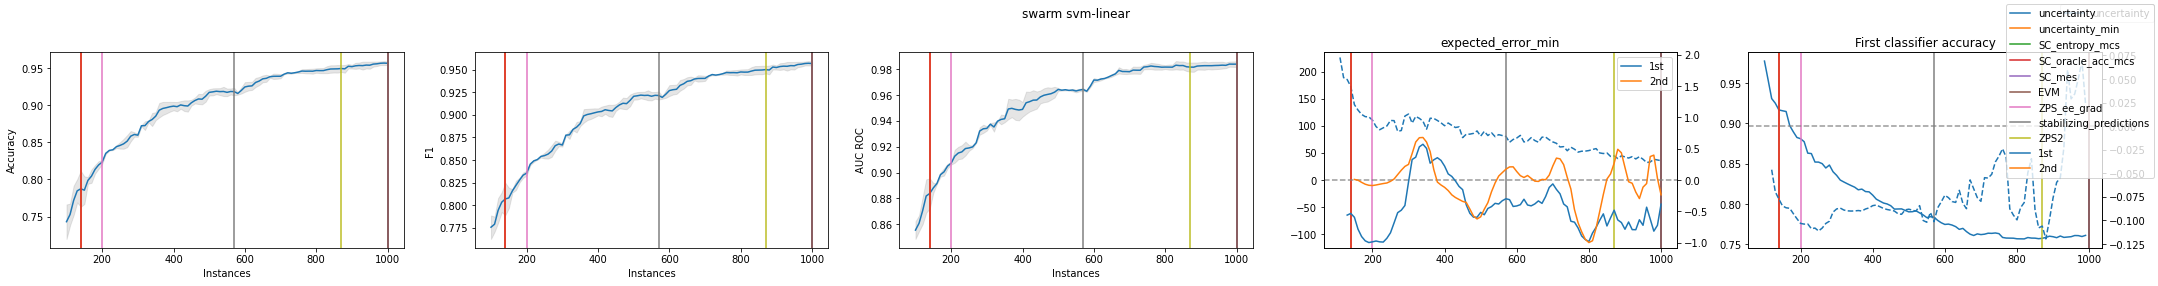

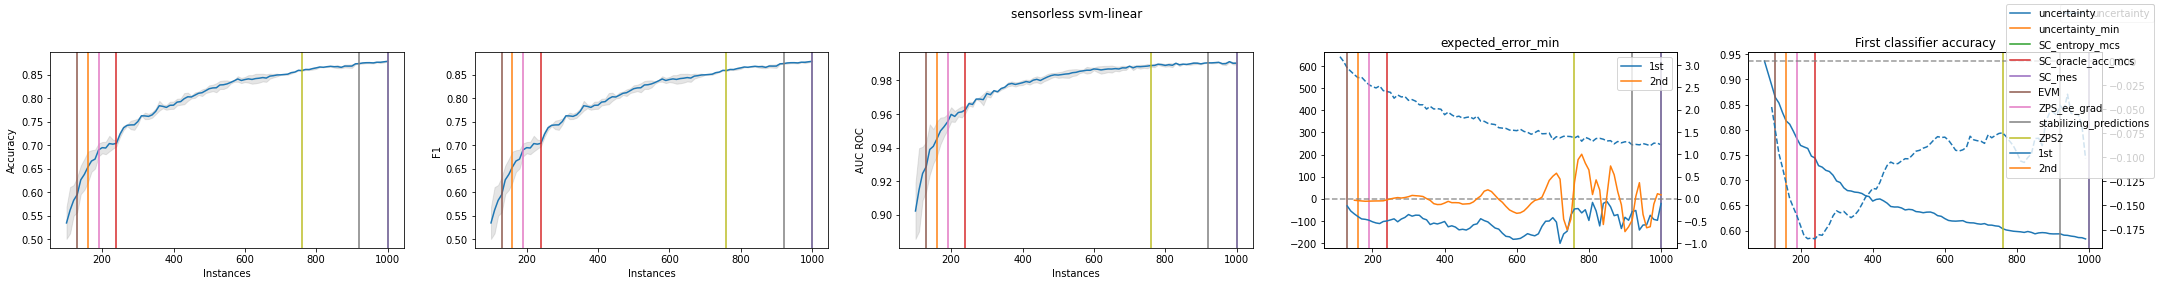

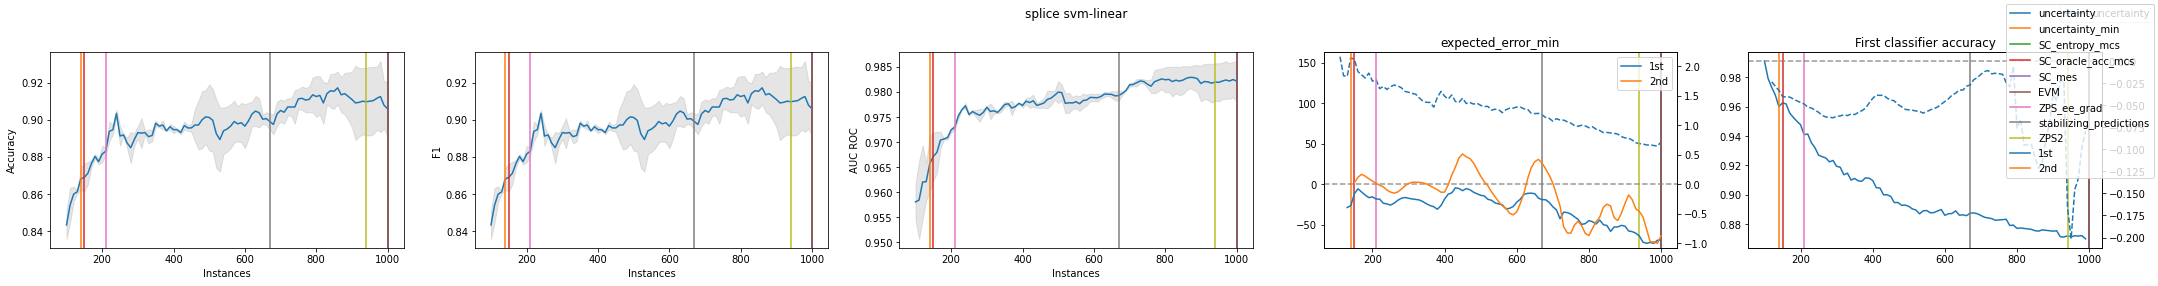

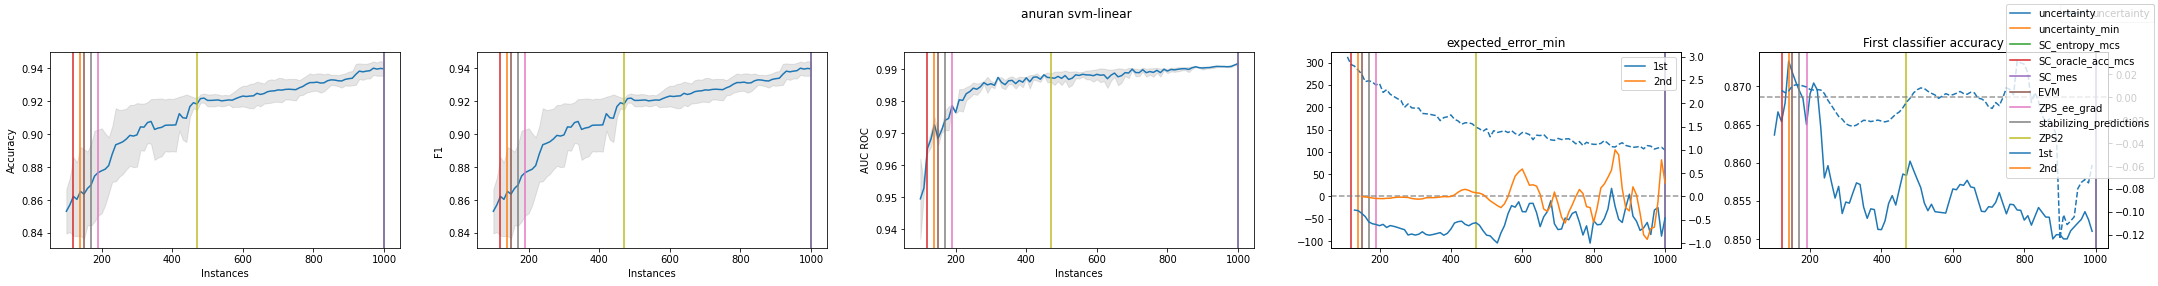

In [53]:
reload(librun)
librun.plot_stop(results_plots, classifiers, stop_conditions, stop_results, figsize=(30, 4))